# Importing the required libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importing the dataset

In [ ]:
#loading and reading the dataset
adv_data = pd.read_csv("adverts.csv")
adv_data.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel


### Checking data types and nullable values

adv_data.info()

In [ ]:
# To specifically check for null value counts, we'll run the code below:
adv_data.isna().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [ ]:
#display columns names
adv_data.columns

Index(['public_reference', 'mileage', 'reg_code', 'standard_colour',
       'standard_make', 'standard_model', 'vehicle_condition',
       'year_of_registration', 'price', 'body_type', 'crossover_car_and_van',
       'fuel_type'],
      dtype='object')

1. **public_reference**: A unique integer identifier for each advert.
2. **mileage**: The mileage of the vehicle (float).
3. **reg_code**: Registration code, possibly indicating the region or year of registration (categorical).
4. **standard_colour**: The color of the vehicle (categorical).
5. **standard_make**: The make of the vehicle (categorical).
6. **standard_model**: The model of the vehicle (categorical).
7. **vehicle_condition**: The condition of the vehicle (categorical) (e.g., new, used).
8. **year_of_registration**: The year the vehicle was registered.
9. **price**: The selling price (integer) of the vehicle - our target variable for prediction.
10. **body_type**: The body type of the vehicle (categorical) (e.g., SUV, Saloon).
11. **crossover_car_and_van**: A boolean indicating whether the vehicle is a crossover between a car and a van.
12. **fuel_type**: The type of fuel the vehicle uses (categorical).

# 1. Data Preprocessing for Machine Learning


### 1.1 Checking for Duplicates in Public Reference Column

In [ ]:
duplicates=adv_data.duplicated(subset=['public_reference'], keep=False)

num_duplicates=duplicates.sum()
num_duplicates

0

Check shows the data has no duplicate

### 1.2 Dealing with `Year_of_Registration` Feature

In [ ]:
#Checking year of registration value counts
adv_data['year_of_registration'].value_counts()

year_of_registration
2017.0    68790
2016.0    43483
2019.0    39236
2018.0    38300
2015.0    29019
          ...  
1010.0        1
1934.0        1
1016.0        1
1063.0        1
1015.0        1
Name: count, Length: 84, dtype: int64

The application of the `value_counts()` method on the `year_of_registration` feature above reveals the presence of some irregularities in the feature in the form of `1010`,`1016`,`1063`,`1015` e.t.c. and also the years recorded as `2017.0` as seen above which are likely a result of an input error.

In [ ]:
#Checking null value counts in year of registration
adv_data['year_of_registration'].isnull().sum()

33311

#### Preparing 'Year_of_registration' for Data Exploration and Visualisation

In order to make sense of our exploration and visualization, we'll handle the missing values in the `year_of_registration` feature. We will iterate over each value under the `year_of_registration` feature and temporarily replace anywhere a missing value (NaN) is found with -1 and we'll equally convert the years to an integer format from appearing as `2017.0` to `2017`.

In [ ]:
# Converting the 'year_of_registration' column in adverts_data to integer, handling missing values
for i in range(len(adv_data['year_of_registration'])):
    if pd.isna(adv_data.at[i, 'year_of_registration']):
        # Replacing NaN with a default value, e.g., -1
        adv_data.at[i, 'year_of_registration'] = -1

# Converting the 'year_of_registration' column to integer
adv_data['year_of_registration'] = adv_data['year_of_registration'].astype(int)

In [ ]:
adv_data['year_of_registration'].unique()

array([  -1, 2011, 2017, 2016, 2015, 2013, 2008, 2019, 2010, 2012, 2018,
       2009, 1984, 2014, 2003, 2006, 2020, 2005, 2000, 2002, 2007, 2004,
       1991, 2001, 1986, 1998, 1990, 1993, 1987, 1994, 1999, 1970, 1988,
       1995, 1997, 1969, 1992, 1989, 1996, 1976, 1983, 1980, 1973, 1962,
       1967, 1972, 1982, 1968, 1979, 1964, 1933, 1981, 1985, 1978, 1971,
       1974, 1966, 1977, 1961, 1965, 1007, 1957, 1515, 1963, 1063, 1954,
       1975, 1955, 1009, 1016, 1960, 1956, 1959, 1909, 1934, 1958, 1010,
       1950, 1008, 1018,  999, 1017, 1952, 1006, 1015])

In [ ]:
adv_data[adv_data['year_of_registration'] == 1515]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
69516,202010155035879,96659.0,65,Black,Audi,A4 Avant,USED,1515,10385,Estate,False,Diesel


After examining the untruncated `year_of_registration` feature above, 12 different years were identified to be input errors as listed as follows, `1007`, `999`, `1009`, `1515`, `1008`, `1006`, `1017`, `1018`, `1010`, `1063`, `1016`, and `1015`.

In [ ]:
adv_data[adv_data['year_of_registration'] == 999]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
201626,202010155037484,69346.0,64,Red,Mazda,Mazda3,USED,999,8795,Saloon,False,Petrol
213059,202009304380359,54569.0,08,Silver,BMW,Z4,USED,999,7999,Convertible,False,Petrol
334679,202010094789497,107934.0,13,Blue,Audi,A3,USED,999,8895,Hatchback,False,Diesel


In [ ]:
adv_data[adv_data['year_of_registration'] == 1063]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
84501,202009163810376,37771.0,63,Black,Smart,fortwo,USED,1063,4785,Coupe,False,Petrol


From domain knowledge the input errors can be handled by changing the  first `1` in years like `1007`, `1009`, `1010`,`1017` e.t.c. to `2`, with a justifiable assumption years being `2007`, `2009`, `2010`, `2017`, and the year `1515` to `2015` as the `Audi A4 Avant` was first introduced in `November 1995` which is also reasonable assumption, but would be dropping the year `999` which we might assume to be `1999` but both the `Mazda3` & `BMW Z4` were first introduced in the year `2003`. The year `1063` would aslo be dropped which we might also assume to be `1963` but the vehicle `Smart fortwo` was first launched in the year `1998`. The above was done with the ideology that the vehicles cannot be registerd before they were ever launched.

Furthermore, only the years `1007`, `1009`, `1008`, `1006`, `1017`, `1018`, `1010`, `1016`, and `1015` would be rectified, and the years `1515`, `999` and `1063` wil be dropped.

In [ ]:
# Rectifying the specified years
year_mapping = {
    1007: 2007,
    1009: 2009,
    1008: 2008,
    1006: 2006,
    1017: 2017,
    1018: 2018,
    1010: 2010,
    1016: 2016,
    1015: 2015
}

adv_data['year_of_registration'].replace(year_mapping, inplace=True)

# Dropping rows with the specified years
years_to_drop = [999, 1515, 1063]
adv_data = adv_data[~adv_data['year_of_registration'].isin(years_to_drop)]

# Resetting the index after dropping rows
adv_data.reset_index(drop=True, inplace=True)

Now that the year_of_registration feature has been rectifed we can now check its true distribution.

In [ ]:
skewness = adv_data['year_of_registration'].skew()
print(f"Skewness: {skewness}")

Skewness: -3.025995482545986


The distribution is now left-skewed, indicating that newer models are more common in the dataset.

### 1.3 Data Processing for Data Exploration and Visualisation

In [ ]:
# Looking out for wrong data types
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402000 entries, 0 to 401999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402000 non-null  int64  
 1   mileage                401873 non-null  float64
 2   reg_code               370143 non-null  object 
 3   standard_colour        396622 non-null  object 
 4   standard_make          402000 non-null  object 
 5   standard_model         402000 non-null  object 
 6   vehicle_condition      402000 non-null  object 
 7   year_of_registration   402000 non-null  int32  
 8   price                  402000 non-null  int64  
 9   body_type              401163 non-null  object 
 10  crossover_car_and_van  402000 non-null  bool   
 11  fuel_type              401399 non-null  object 
dtypes: bool(1), float64(1), int32(1), int64(2), object(7)
memory usage: 32.6+ MB


We can observe from the above that 6 columns (Mileage, Reg Code, Standard Colour, Year of Registration, Body Type, and Fuel Type) contain missing values. Year of Registration and Registration Code have substantial numbers of missing values of 33311 and 31857 respectively while Mileage contains the lowest number of missing values.

### 1.4  Further handling of missing values in 'Year_of_Registration'

The missing values in the `year_of_registration` feature were temporarily replaced with `-1` to ensure the easy analysis of the feature distribution. Now to properly handle all missing values in the dataset, the earlier modification of the missing values in the `year_of_reagistration` feature must be reverted by replacing all values with `-1` in to feature with `Na`.

In [ ]:
# Replacing -1 with NaN in the 'year_of_registration' column
adv_data['year_of_registration'] = adv_data['year_of_registration'].replace(-1, pd.NA)


In [ ]:
# Checking for missing value
adv_data.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31857
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33311
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

We have our missing value back in the year of registration column

### 1.5  Visualizing missing values across the columns

In [ ]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


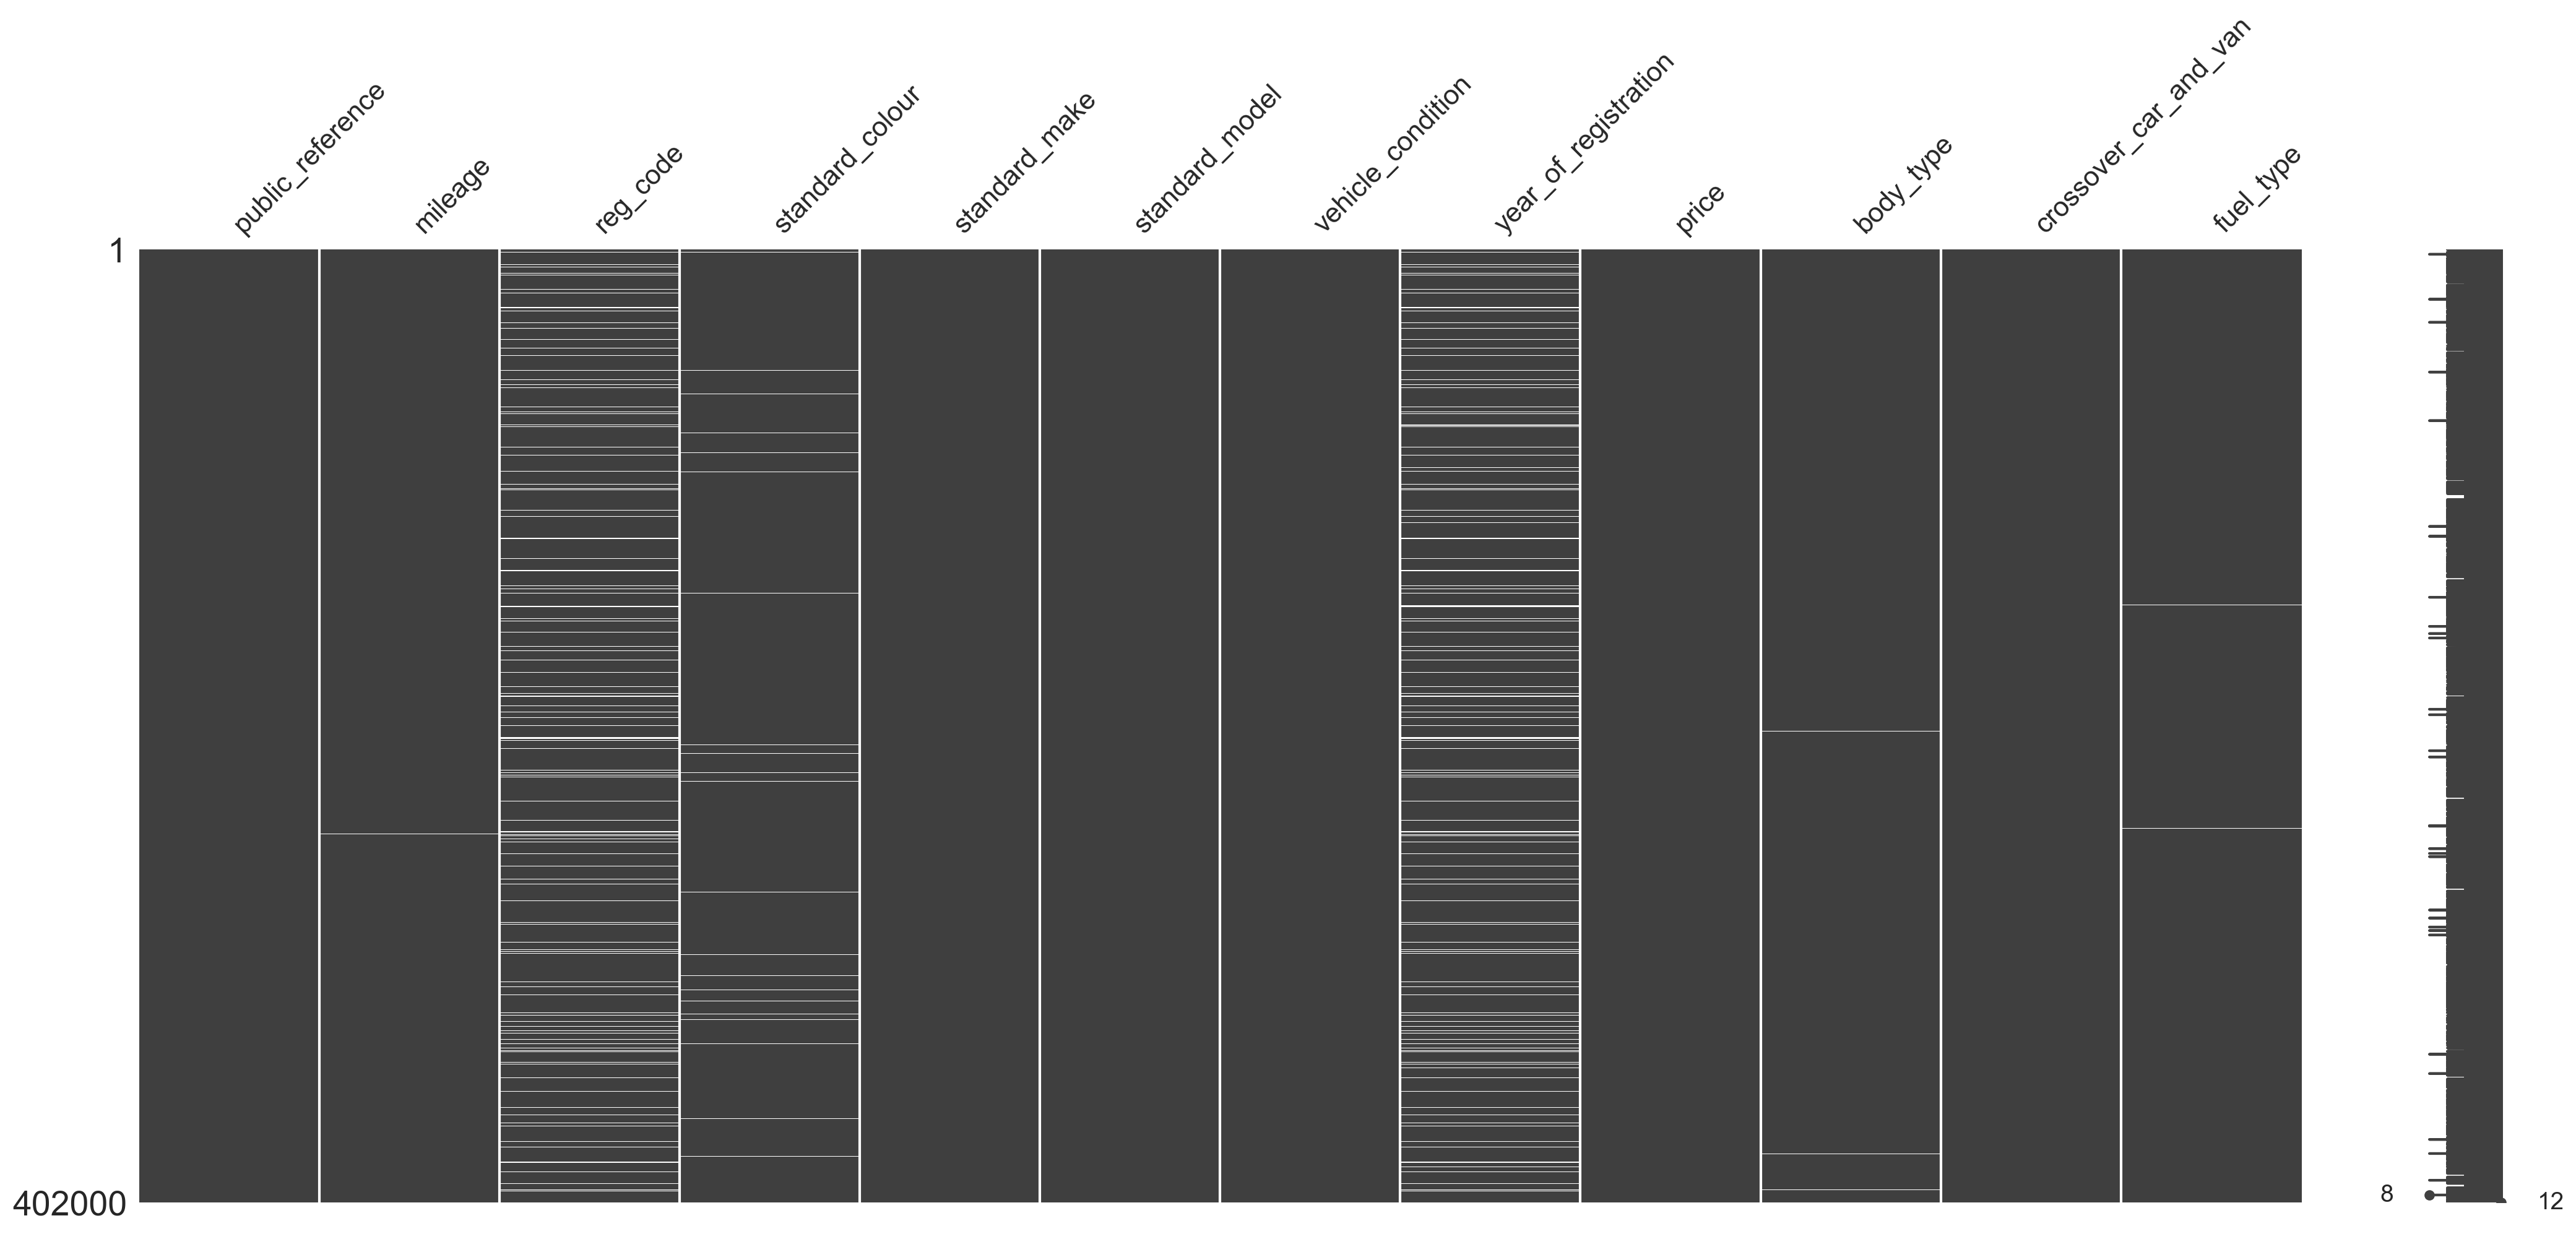

In [ ]:
import missingno as msno

# Visualizing missing values in the adverts_data with missingno

msno.matrix(adv_data)
plt.show()

In [ ]:
# Getting the percentage of missing values
null_counts = adv_data.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
(columns_with_nulls / len(adv_data)) * 100

mileage                 0.031592
reg_code                7.924627
standard_colour         1.337811
year_of_registration    8.286318
body_type               0.208209
fuel_type               0.149502
dtype: float64

From the above, we can observe that the percent of columns with missing features are all below 10%, hence we will not drop these columns

### 1.6a Filling missing values in year of registration for New Vehicles

In [ ]:
# Replacing missing values in 'year_of_registration' with 2020 for 'NEW' vehicles
# First, let's identify rows where 'year_of_registration' is missing and 'vehicle_condition' is 'NEW'
condition_new_mask = (adv_data['vehicle_condition'] == 'NEW') & (adv_data['year_of_registration'].isnull())

# Replaing missing values in 'year_of_registration' with 2020 for these rows
adv_data.loc[condition_new_mask, 'year_of_registration'] = 2020

adv_data.head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,2020,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel


`Justification`

1. The year of registration indicates the vehicle's age and is often used to determine its price. However, handling missing values in this feature is difficult since it does not follow a normal distribution. To ensure the integrity of the dataset, we’ll drop all missing values in the year of registration feature for the 'USED' category.
2. Initially, I thought dropping missing values in the year of registration` was best. However, it erases new vehicle data under vehicle conditions, which is bad for modeling. This was discovered in section 2.2, and I had to revisit our approach. The missing values will be replaced with a placeholder year say 2020 which is expected to be the most recent year in the dataset.


### 1.6b Dropping missing values in the year of registration

In [ ]:
# Dropping the missing values in the 'year_of_registartion' column
adv_data = adv_data.dropna(subset=['year_of_registration'])

In [ ]:
adv_data.isnull().sum()
adv_data.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,2020,73970,SUV,False,Petrol Plug-in Hybrid


In [ ]:
adv_data.isnull().sum()

public_reference             0
mileage                    108
reg_code                 31536
standard_colour           5286
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                  544
crossover_car_and_van        0
fuel_type                  465
dtype: int64

In [ ]:
# checking for any other missing values in the 'year_of_registration' column
adv_data['year_of_registration'].isnull().sum()

0

Check above now shows that there are no more missing values in the year of registration column

### 1.7  Dealing with Standard Colour Feature

In [ ]:
adv_data['standard_colour'].nunique()

22

As previously mentioned in relation to the year of registration, all missing values in the standard_color feature will be eliminated because it is not possible to predict a vehicle's color based on the color of other vehicles or the other features in the dataset.

In [ ]:
# Dropping missing values in the 'standard_colour' column
adv_data = adv_data.dropna(subset=['standard_colour'])


In [ ]:
adv_data.head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,2020,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel


In [ ]:
# Filling other missing values in categorical features
adv_data = adv_data.dropna(subset=['body_type'])
adv_data = adv_data.dropna(subset=['fuel_type'])

In [ ]:
# checking for any other missing values in the dataset
adv_data.isnull().sum()

public_reference             0
mileage                     98
reg_code                 30290
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
dtype: int64

From the above, we observed the following:

Mileage: As a result, the best course of action is to remove the column containing the missing values. Since each vehicle is unique and has a different speed and distance driven, it is not possible to logically estimate the missing values in the mileage column from the mileage of other vehicles using simple imputer algorithms, or from other features using other algorithms.

Reg_Code: The missing value in the reg_code column will be removed since the feature can only be utilized for data administration and has no bearing whatsoever on the car price. As a result, the column will be removed under the feature engineering section.

Body and Fuel Type: The missing values in the columns will be removed since the body and fuel type of each vehicle are not usually distributed or may be inferred from other factors.

In [ ]:
adv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 393806 entries, 0 to 401999
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       393806 non-null  int64  
 1   mileage                393708 non-null  float64
 2   reg_code               363516 non-null  object 
 3   standard_colour        393806 non-null  object 
 4   standard_make          393806 non-null  object 
 5   standard_model         393806 non-null  object 
 6   vehicle_condition      393806 non-null  object 
 7   year_of_registration   393806 non-null  object 
 8   price                  393806 non-null  int64  
 9   body_type              393806 non-null  object 
 10  crossover_car_and_van  393806 non-null  bool   
 11  fuel_type              393806 non-null  object 
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 36.4+ MB


As we can see, we have mileage next to deal with before we proceed. We will handle the rest of the categorical feature in our data pipeline preprocessing steps.

### Dealing with Mileage Feature


Converting mileage column to integer datatype so we can calculate the mean and fill the missing values with it.

In [ ]:
#converting mileage to integer for ease of classification
adv_data['mileage']= adv_data['mileage'].astype("Int64")

In [ ]:
# Dropping the missing values in the mileage column
adv_data = adv_data.dropna(subset=['mileage'])
adv_data.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0,NaN,Grey,Volvo,XC90,NEW,2020,73970,SUV,False,Petrol Plug-in Hybrid
1,202007020778260,108230,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel
2,202007020778474,7800,17,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol
3,202007080986776,45000,16,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel
4,202007161321269,64000,64,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel


### Now, we'll confirm no existence of missing value(s) in the mileage column

In [ ]:
#checking the missing values are now filled
adv_data.isnull().sum().sort_values()

public_reference             0
mileage                      0
standard_colour              0
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration         0
price                        0
body_type                    0
crossover_car_and_van        0
fuel_type                    0
reg_code                 30289
dtype: int64

### Checking for Outliers

Besides the price feature the mileage is the only true numerical feature in the dataset, hence it is essential to check the mileage feature for the presence of outliers.

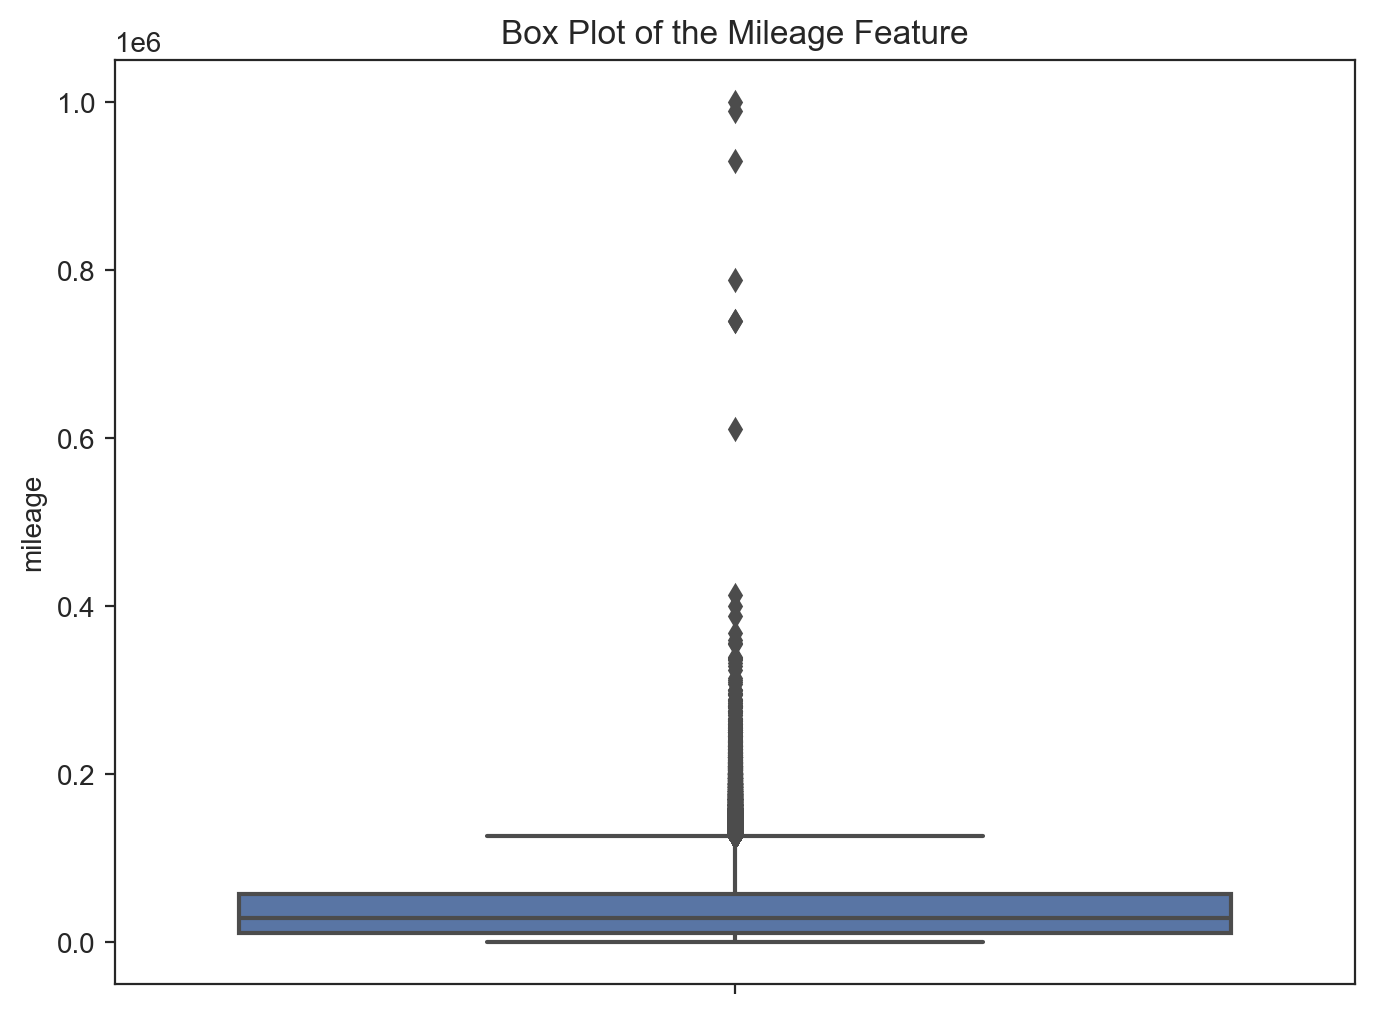

In [ ]:
# Creating a box plot for the 'mileage' column
plt.figure(figsize=(8, 6))
sns.boxplot(y=adv_data['mileage'])
plt.title('Box Plot of the Mileage Feature')
plt.show()

We observed that extreme values in the mileage features are not necessarily input errors or outliers as the dataset comprises both new and old models, used and new vehicles which can justify the presence of the outliers; hence the outliers won't be modified. Although the outliers may be seen as noise by the model, they will be scaled under the feature engineering section.

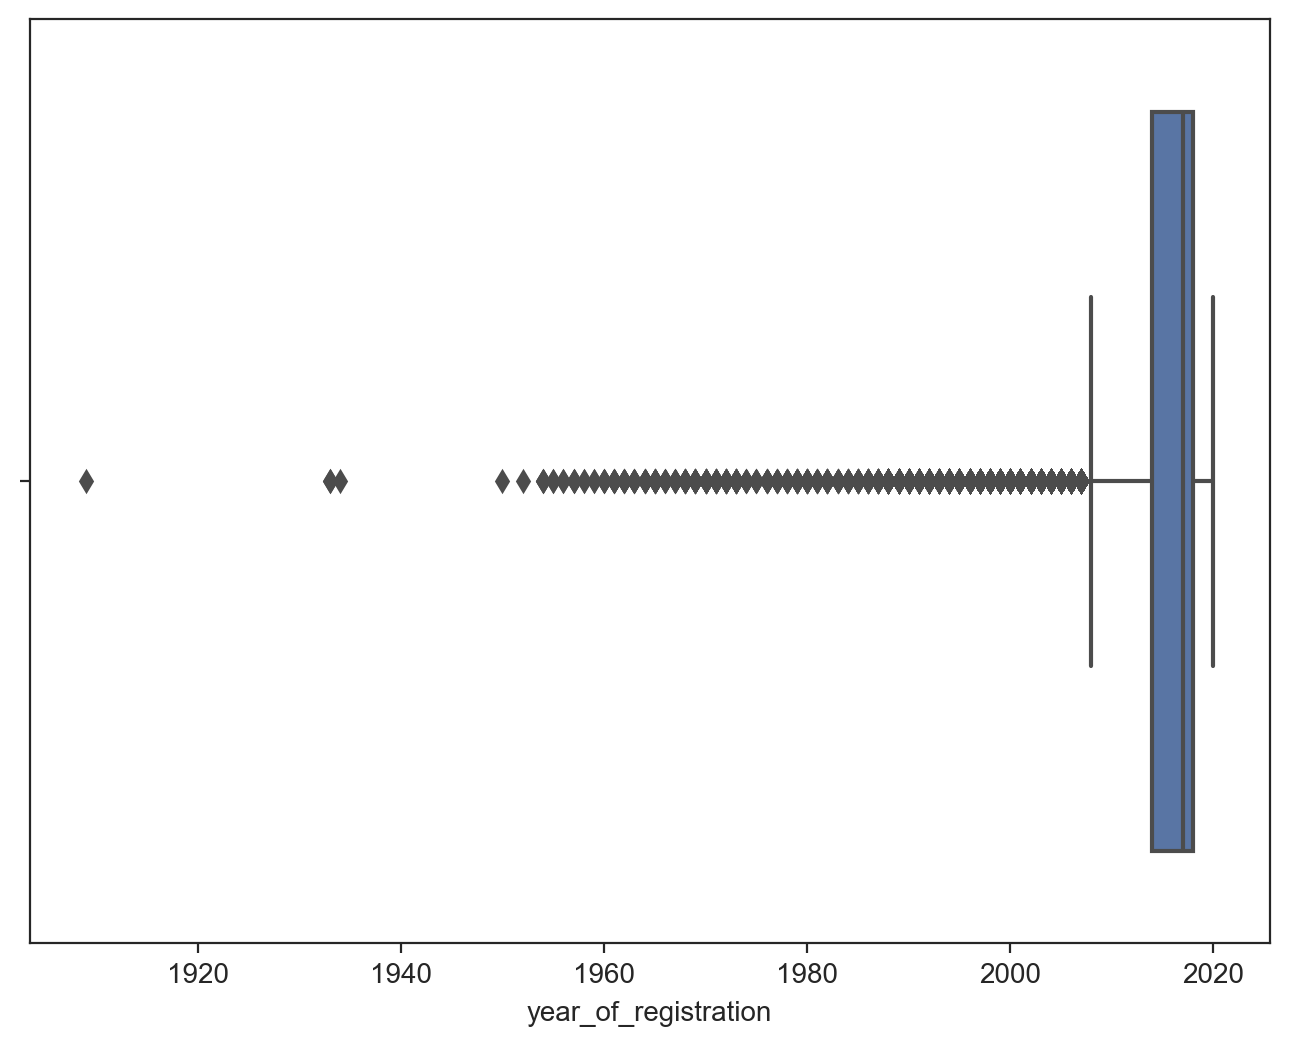

In [ ]:
plt.subplots(figsize=(8,6))
sns.boxplot(x=adv_data['year_of_registration']);

From our car registration information, the first car was manufactured in 1904 but as we can see from our dataset that we have some cars registered before then. This could be due to data entry error or any other factor. We'll exclude them from our analysis for later investigation. It was equally observed that most of the cars placed for advert were registered in the 20's

# 2.0 Feature Engineering

### Dropping  'public_reference' and 'reg_code' columns

Since public reference does not have any influence in determining the price of the vehicle, we'll drop the column. We'll equally drop reg_code column as the column is completely filled with errorneous entris without a patter to transform it.

In [ ]:
# Dropping the 'public_reference' and 'reg_code' columns
adv_data = adv_data.drop(['public_reference', 'reg_code'], axis=1)

In [ ]:
adv_data.head(2)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0,Grey,Volvo,XC90,NEW,2020,73970,SUV,False,Petrol Plug-in Hybrid
1,108230,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel


### Creating Additional Feature 'Age'

Since the year of registration can be used as proxy for the age of the vehicle the. A Vehicle's Age feature will be created from the year_of_registration feature to derive the vehicle's age and the year maximum year on our dataset will be used as a reference year assuming the vehicle's were advertised on Autotrader's website that same year.

In [ ]:
##Checking most recent year
adv_year = adv_data['year_of_registration'].max()
adv_year

2020

In [ ]:
#Creating the new feature
adv_data['Age']= adv_year - adv_data.year_of_registration
adv_data.head()

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,Age
0,0,Grey,Volvo,XC90,NEW,2020,73970,SUV,False,Petrol Plug-in Hybrid,0
1,108230,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel,9
2,7800,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol,3
3,45000,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel,4
4,64000,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel,5


As we have introduced a new feature to determine the age of the vehicle , we'll now drop year_of_registration column as the Age now represents the year_of_registration.

In [ ]:
# Dropping the 'year_of_registration' column
adv_data = adv_data.drop('year_of_registration', axis=1)

#Confirming the column is dropped
adv_data.head(2)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,crossover_car_and_van,fuel_type,Age
0,0,Grey,Volvo,XC90,NEW,73970,SUV,False,Petrol Plug-in Hybrid,0
1,108230,Blue,Jaguar,XF,USED,7000,Saloon,False,Diesel,9


In [ ]:
#converting Age to integer for ease of classification
adv_data['Age']= adv_data['Age'].astype("Int64")

### Dropping  'crossover_car_and_van' columns

As a result of the 'crossover_car_and_van' feature comprising largely of the False value, the feature will be dropped to prevent bias on the minority class.

In [ ]:
adv_data['crossover_car_and_van'].value_counts()

crossover_car_and_van
False    392008
True       1700
Name: count, dtype: int64

In [ ]:
adv_data = adv_data.drop(['crossover_car_and_van'], axis=1)
adv_data.head(2)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,Age
0,0,Grey,Volvo,XC90,NEW,73970,SUV,Petrol Plug-in Hybrid,0
1,108230,Blue,Jaguar,XF,USED,7000,Saloon,Diesel,9


### 2.1 Subsetting

### Some feature selections and row sampling

### Top 5 most expensive cars with their age and mileage

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,Age
51741,4400,Black,Bugatti,Veyron,USED,2850000,Coupe,Petrol,6
223831,1000,Blue,Bugatti,Chiron,USED,2500000,Coupe,Petrol,2
72680,475,Yellow,Ferrari,LaFerrari,USED,2299950,Coupe,Petrol,5
378063,2247,Red,Ferrari,LaFerrari,USED,2195000,Coupe,Petrol Plug-in Hybrid,6
323756,1382,Red,Ferrari,LaFerrari,USED,2150000,Coupe,Petrol,5


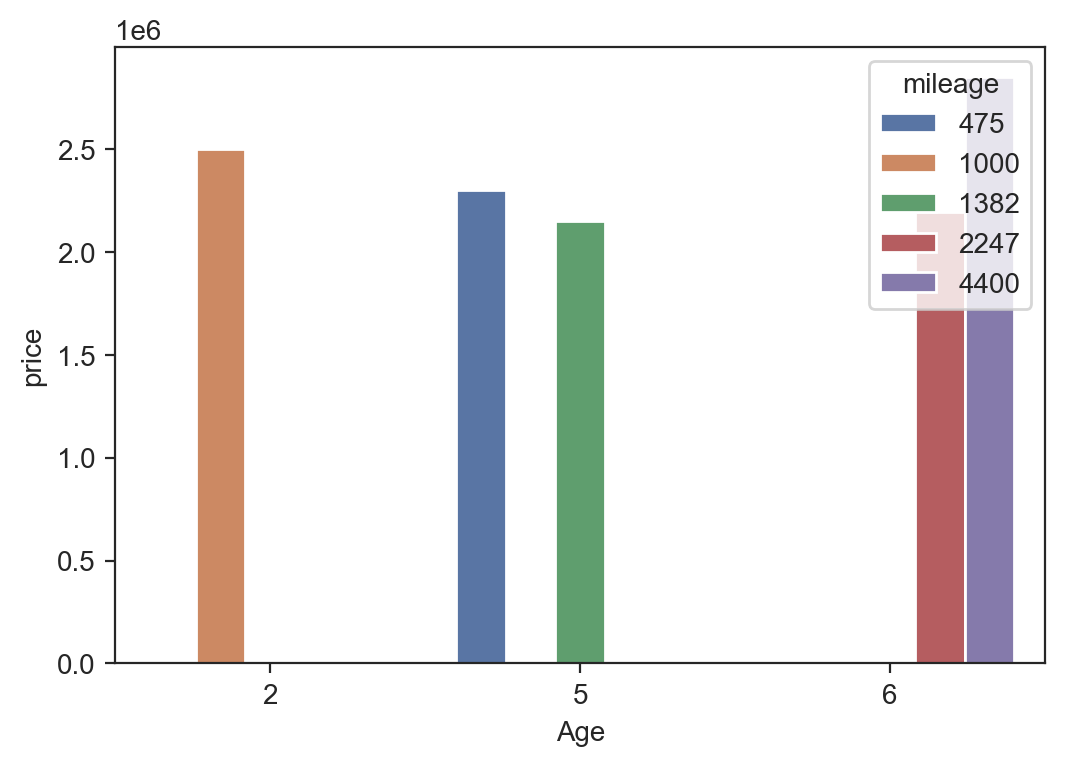

In [ ]:
# Top 5 most expensive cars with their age and mileage
oldest_vehicles = adv_data.sort_values( ['price','Age'], ascending=[False,True]).head(5)
sns.barplot(data=oldest_vehicles, x='Age', y='price', hue='mileage')
oldest_vehicles

## List of New Vehicles with mileage above zero

In [ ]:
#Viewing NEW cars with mileage above zero
adv_data.loc[(adv_data['vehicle_condition']=='NEW') & (adv_data['mileage']>0)].sort_values(by=['mileage'] , ascending=False)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,Age
235496,100,Grey,Mitsubishi,L200,NEW,20200,Pickup,Diesel,0
290188,100,White,SsangYong,Rexton,NEW,36395,SUV,Diesel,0
121689,100,Orange,Vauxhall,Corsa,NEW,20261,Hatchback,Petrol,0
120177,100,Blue,DS AUTOMOBILES,DS 3 CROSSBACK,NEW,30990,SUV,Electric,0
324446,100,Red,Vauxhall,Crossland X,NEW,19371,SUV,Petrol,0
...,...,...,...,...,...,...,...,...,...
383745,1,White,Peugeot,508,NEW,25995,Hatchback,Diesel,0
256002,1,Grey,Mazda,MX-5,NEW,24990,Convertible,Petrol,0
294810,1,White,Peugeot,5008,NEW,36250,SUV,Diesel,0
231095,1,Red,Mitsubishi,Eclipse Cross,NEW,28500,SUV,Petrol,0


The above producs a list of new vehicles that have been driven already. This could be due to testing or transacporting the vehicles for sales.

### Generating a unique lists of vehicle make

In [ ]:
#counting unique vehicle make
adv_vehicle = adv_data['standard_make'].nunique()

In [ ]:
# A quick view of our vehicle makes
adv_data['standard_make'].unique()

array(['Volvo', 'Jaguar', 'SKODA', 'Vauxhall', 'Land Rover', 'Audi',
       'Mercedes-Benz', 'Volkswagen', 'Peugeot', 'SEAT', 'MINI', 'BMW',
       'Nissan', 'Mitsubishi', 'Citroen', 'Toyota', 'Kia', 'Renault',
       'Fiat', 'Honda', 'Bentley', 'DS AUTOMOBILES', 'Hyundai',
       'Aston Martin', 'McLaren', 'Smart', 'Alfa Romeo', 'Porsche',
       'Abarth', 'Mazda', 'Suzuki', 'MG', 'Dacia', 'Subaru', 'SsangYong',
       'Maserati', 'Ferrari', 'Saab', 'Rolls-Royce', 'Lexus', 'Jeep',
       'Panther', 'Chevrolet', 'Lamborghini', 'Daihatsu', 'Dodge',
       'Isuzu', 'Tesla', 'TVR', 'Rover', 'Cadillac', 'Lotus', 'Infiniti',
       'Alpine', 'Chrysler', 'Triumph', 'Morgan',
       'London Taxis International', 'Daimler', 'CUPRA', 'Perodua',
       'Lincoln', 'Bugatti', 'Great Wall', 'Replica', 'Opel', 'Proton',
       'Lancia', 'Austin', 'Morris', 'Westfield', 'Maybach', 'LEVC',
       'Iveco', 'Caterham', 'Hummer', 'Carbodies', 'Jensen',
       'International', 'Daewoo', 'Wolseley', 'Pilgr

In [ ]:
# Viewing unique values for vehicle condition
adv_data['standard_colour'].nunique()

22

In [ ]:
# Viewing unique values for vehicle condition
adv_data ['vehicle_condition'] .unique()

array(['NEW', 'USED'], dtype=object)

In [ ]:
#taking the count of vehicle condition
adv_data['vehicle_condition'].nunique()

2

In [ ]:
adv_data['body_type'].nunique()

16

In [ ]:
adv_data['body_type'].unique()

array(['SUV', 'Saloon', 'Hatchback', 'Convertible', 'Limousine', 'Estate',
       'MPV', 'Coupe', 'Pickup', 'Combi Van', 'Panel Van', 'Minibus',
       'Window Van', 'Car Derived Van', 'Camper', 'Chassis Cab'],
      dtype=object)

In [ ]:
adv_data['fuel_type'].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', 'Bi Fuel',
       'Natural Gas'], dtype=object)

In [ ]:




adv_data['Age'].unique

<bound method Series.unique of 0          0
1          9
2          3
3          4
4          5
          ..
401995     1
401996    11
401997     8
401998     5
401999     6
Name: Age, Length: 393708, dtype: Int64>

In [ ]:
adv_data.isnull().sum()

mileage              0
standard_colour      0
standard_make        0
standard_model       0
vehicle_condition    0
price                0
body_type            0
fuel_type            0
Age                  0
dtype: int64

# Splitting the dataset

### Creating Preprocessing Pipeline Steps for Machine Learning

In [ ]:
# importing required library for preprocessing steps to be implemented as a single machine learning pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Define numerical and categorical columns explicitly
numerical_cols = ['mileage', 'Age']  # Adjust with actual numerical column names
categorical_cols = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']  # Adjust with actual categorical column names

# Assuming adverts_data is your DataFrame
# Separate features and target
X = adv_data.drop('price', axis=1)  # features
y = adv_data['price']                # target


# Initializing the LabelEncoder
label_encoder = LabelEncoder()

# Applying Label Encoding to each column
for column in categorical_cols:
    adv_data[column] = label_encoder.fit_transform(adv_data[column].astype(str)).astype(object)

# Pipeline for numerical columns
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Standardize the data
])

# Combine numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, numerical_cols),
        ('categorical', 'passthrough', categorical_cols) ],# No need for imputation, already done during label encoding
    remainder='passthrough'
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['mileage', 'Age']),
                                ('categorical', 'passthrough',
                                 ['standard_colour', 'standard_make',
                                  'standard_model', 'vehicle_condition',
                                  'body_type', 'fuel_type'])])

## Checking for Associations between the categorical variables

For measuring the degree of correlation between categorical variables, Cramér's V is utilized. It is an expansion of Pearson's chi-squared statistic that accounts for the quantity of categories in each variable. Since variables with values closer to 1 have a stronger relationship between them, it generates a standardized measure of association that is straightforward to interpret. Assessing the degree and orientation of the correlation between categorical variables is helpful. Understanding the relationships within the data requires knowledge of this information. Cramer's V is employed in this work as a diagnostic tool for multicollinearity amongst categorical variables. High Cramer's V values suggest strong correlations between the variables, which could cause problems with multicollinearity in the regression model.


In [ ]:
from scipy.stats import chi2_contingency

# Selecting only categorical columns
categorical_columns = adv_data.select_dtypes(include=['object'])

# Defining a function to calculate Cramér's V
def cramers_v(contingency_table):
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    return np.sqrt((chi2 / n) / min_dim)

# Creating a DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_columns.columns, columns=categorical_columns.columns)

# Iterating through all pairs of categorical columns
for col1 in categorical_columns.columns:
    for col2 in categorical_columns.columns:
        contingency_table = pd.crosstab(categorical_columns[col1], categorical_columns[col2])
        v = cramers_v(contingency_table)
        cramers_v_matrix.loc[col1, col2] = v

print(cramers_v_matrix)

                  standard_colour standard_make standard_model  \
standard_colour               1.0      0.111934        0.19736   
standard_make            0.111934           1.0       0.959927   
standard_model            0.19736      0.959927            1.0   
vehicle_condition        0.108525      0.235582       0.381837   
body_type                0.054792      0.262874       0.787307   
fuel_type                0.056486      0.355933       0.545521   

                  vehicle_condition body_type fuel_type  
standard_colour            0.108525  0.054792  0.056486  
standard_make              0.235582  0.262874  0.355933  
standard_model             0.381837  0.787307  0.545521  
vehicle_condition          0.999982  0.132724  0.184017  
body_type                  0.132724       1.0  0.140036  
fuel_type                  0.184017  0.140036       1.0  


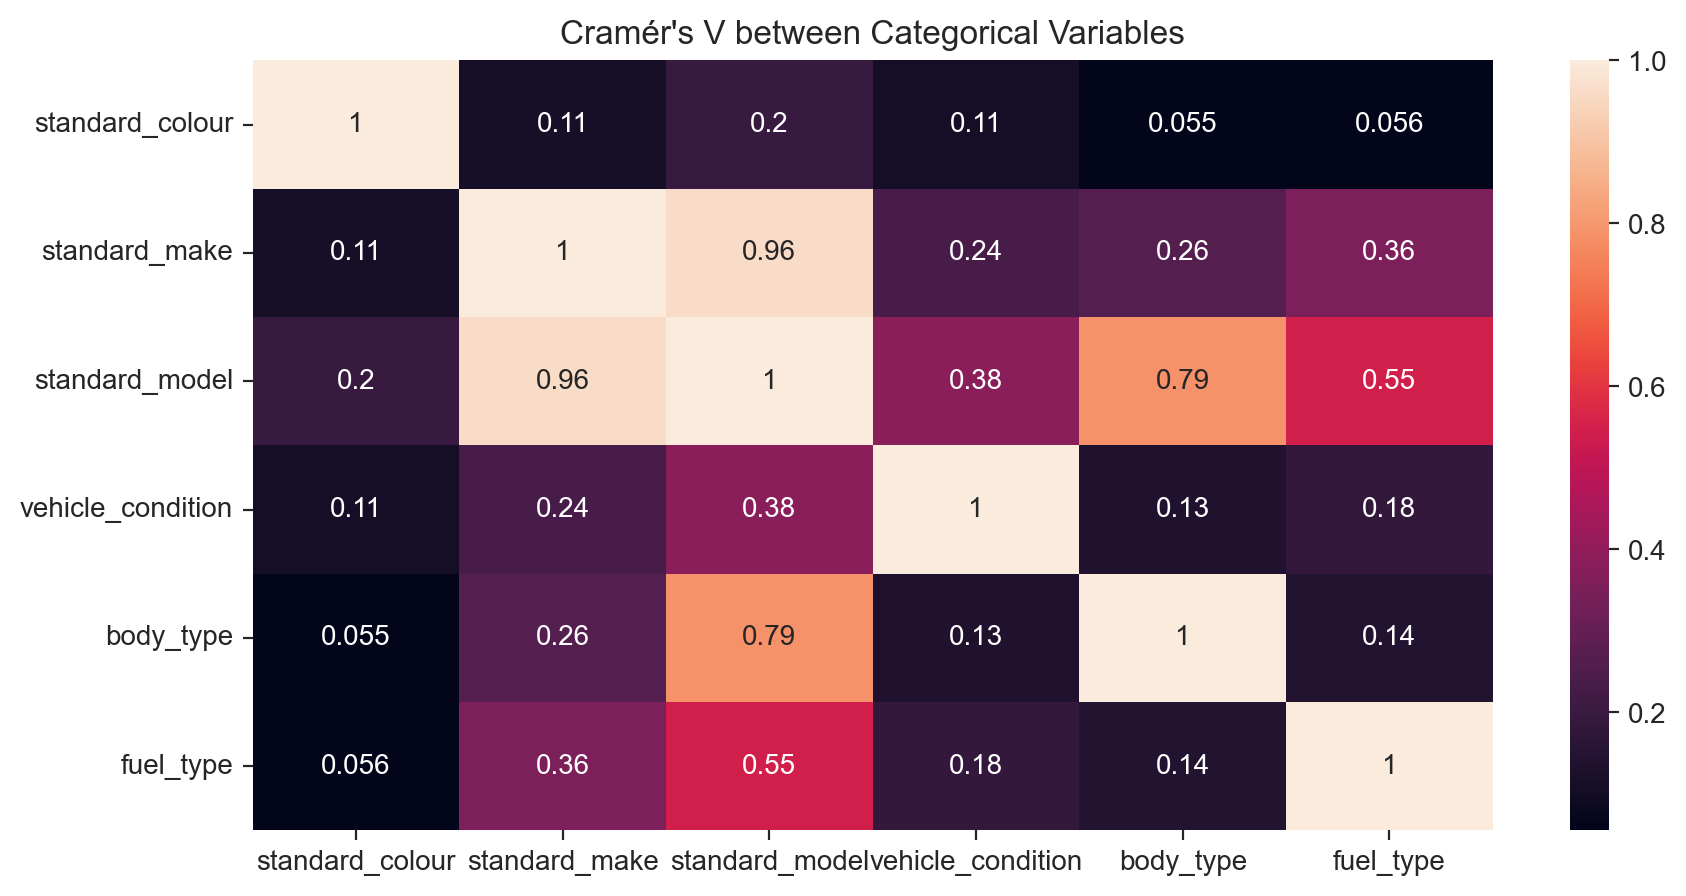

In [ ]:
# Cramer's V plot for categoriacal variables association
plt.figure(figsize=(10, 5))
sns.heatmap(cramers_v_matrix.astype(float), annot=True)
plt.title("Cramér's V between Categorical Variables")
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming adverts_data is your DataFrame
# Separate features and target
X = adv_data.drop('price', axis=1)  # features
y = adv_data['price']                # target

# Perform the split with stratification based on 'vehicle_condition'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=adv_data['vehicle_condition'])

# Define numerical and categorical columns explicitly
numerical_cols = ['mileage', 'Age']  # Adjust with actual numerical column names
categorical_cols = ['standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']  # Adjust with actual categorical column names

# Define the pipeline for numerical columns
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', MinMaxScaler())  # Scale features to a range [0, 1]
])

# Combine numerical and categorical transformations
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, numerical_cols),
        ('categorical', 'passthrough', categorical_cols) ], # No need for imputation, already done during label encoding
    remainder='passthrough'
)

# Define the full pipeline including preprocessing and model fitting
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # Add your model here
])

# Fit the full pipeline on the training data
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage', 'Age']),
                                                 ('categorical', 'passthrough',
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'fuel_type'])]))])

# 3. Feature Selection and Dimensionality Reduction

### 3.1 Dimensionality Reduction(Principal Component Analysis)

As a result of the size of the dataset and the computation requirements needed to process the data the Principal component analysis was used to reduce the dimension of the data, thereby, transforming the original features into new set of orthogonal features or principal components as demonstrated below.

Variance explained by each principal component: [9.89906889e-01 9.36338671e-03 5.72678298e-04 1.03339893e-04
 5.27958352e-05]
Total variance explained by selected components: 0.9999990893933434


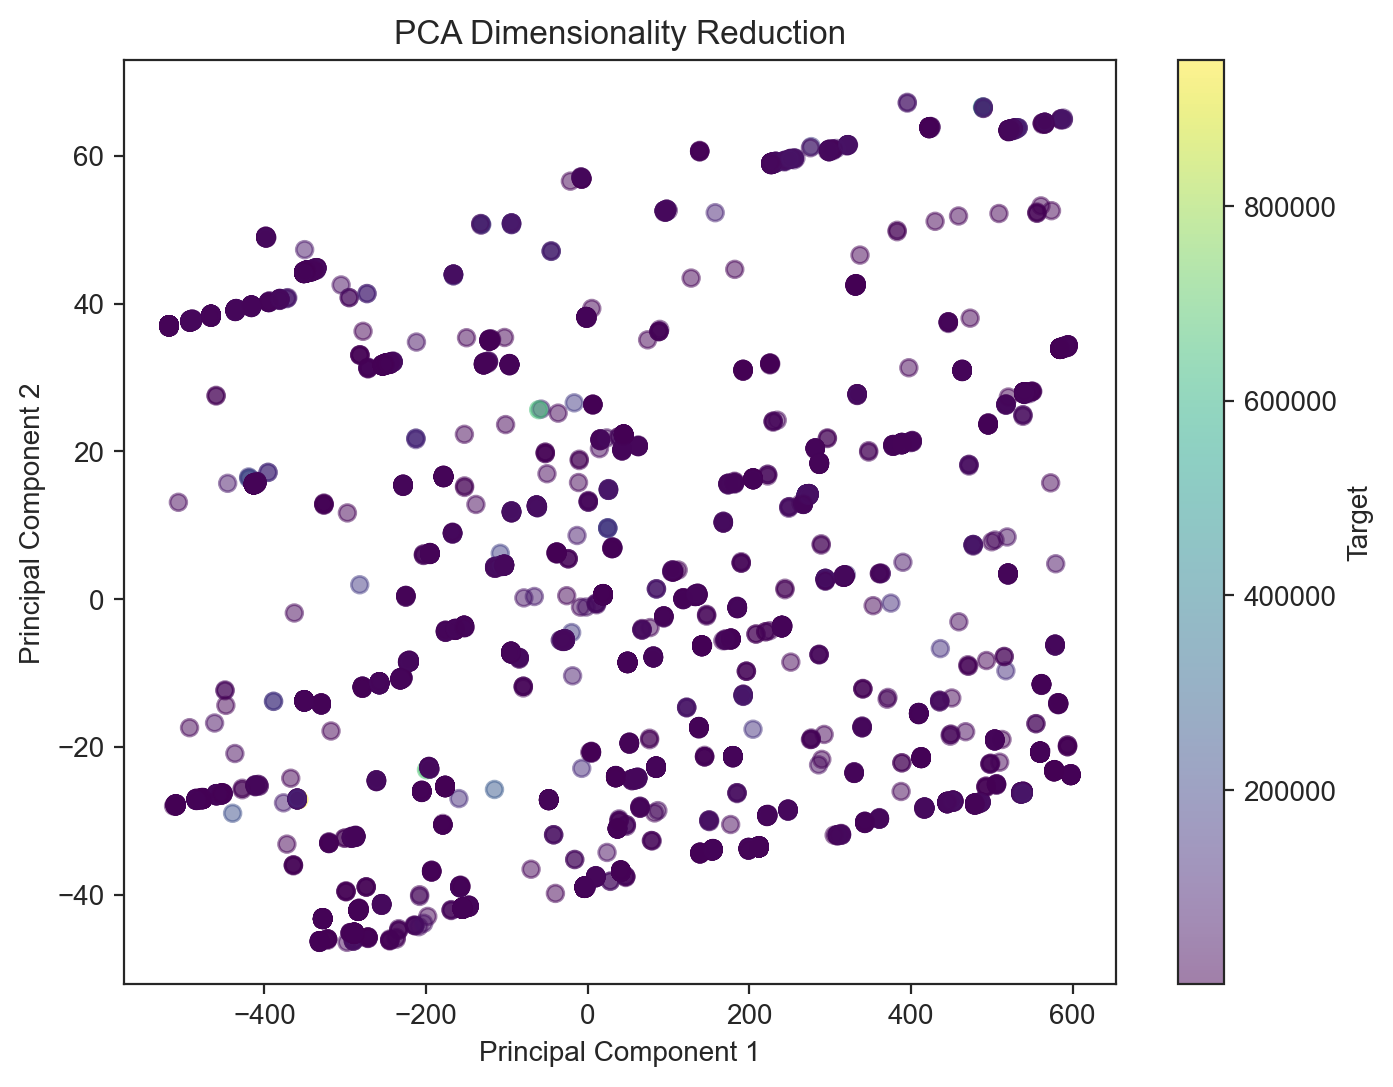

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


# Combine preprocessing steps for numerical and categorical columns

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_pipeline, numerical_cols),
        ('categorical', 'passthrough', categorical_cols) ], # No need for imputation, already done during label encoding
    remainder='passthrough'
)
# Apply preprocessing to the training data
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Initialize PCA with desired number of components and "arpack" solver
n_components = 5
pca = PCA(n_components=n_components, svd_solver='arpack')

# Fit PCA to the preprocessed training data
pca.fit(X_train_preprocessed)

# Transform the training data to the reduced dimensional space
X_train_pca = pca.transform(X_train_preprocessed)

# Variance explained by each principal component
print("Variance explained by each principal component:", pca.explained_variance_ratio_)

# Total variance explained by the selected number of components
print("Total variance explained by selected components:", sum(pca.explained_variance_ratio_))

# Optionally, you can visualize the transformed data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.title('PCA Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target')
plt.show()


### Implementing Preprocessing Pipeline Workflow for the Models

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Assuming you have already encoded your target variable y_train
# If not, you need to encode it using LabelEncoder or OneHotEncoder

# Selecting only the categorical columns from X_train
categorical_data = X_train[categorical_cols]

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in categorical_data
for col in categorical_data.columns:
    categorical_data[col] = label_encoder.fit_transform(categorical_data[col])

# Perform chi-squared test
chi2_scores, chi2_pvalues = chi2(categorical_data, y_train)

# Getting feature names from the list of column names
categorical_feature_names = categorical_cols

# Combining results with feature names into a DataFrame
categorical_chi2_results = pd.DataFrame({
    'feature': categorical_feature_names,
    'chi2_score': chi2_scores,
    'p_value': chi2_pvalues
})

print("Chi-Squared Test Results with Categorical Features:")
print(categorical_chi2_results)


Chi-Squared Test Results with Categorical Features:
             feature     chi2_score        p_value
0    standard_colour   12442.041801   0.000000e+00
1      standard_make   27777.002917   0.000000e+00
2     standard_model  273936.696505   0.000000e+00
3  vehicle_condition     448.385885   1.000000e+00
4          body_type    4998.134745  8.306083e-132
5          fuel_type    3352.548507   7.641840e-14


In [ ]:
# Sort the results by chi2_score
categorical_chi2_results_sorted = categorical_chi2_results.sort_values(by='chi2_score', ascending=False)

# Print the sorted results
print("Sorted Chi-Squared Test Results:")
print(categorical_chi2_results_sorted)

Sorted Chi-Squared Test Results:
             feature    chi2_score  p_value
2     standard_model  6.445993e+06      0.0
1      standard_make  6.820739e+05      0.0
0    standard_colour  1.694384e+05      0.0
4          body_type  6.830041e+04      0.0
5          fuel_type  4.161928e+04      0.0
3  vehicle_condition  1.271987e+04      1.0


For easy visualization and interpretation of a bar chart representation of the result above is required, as demostrated below.

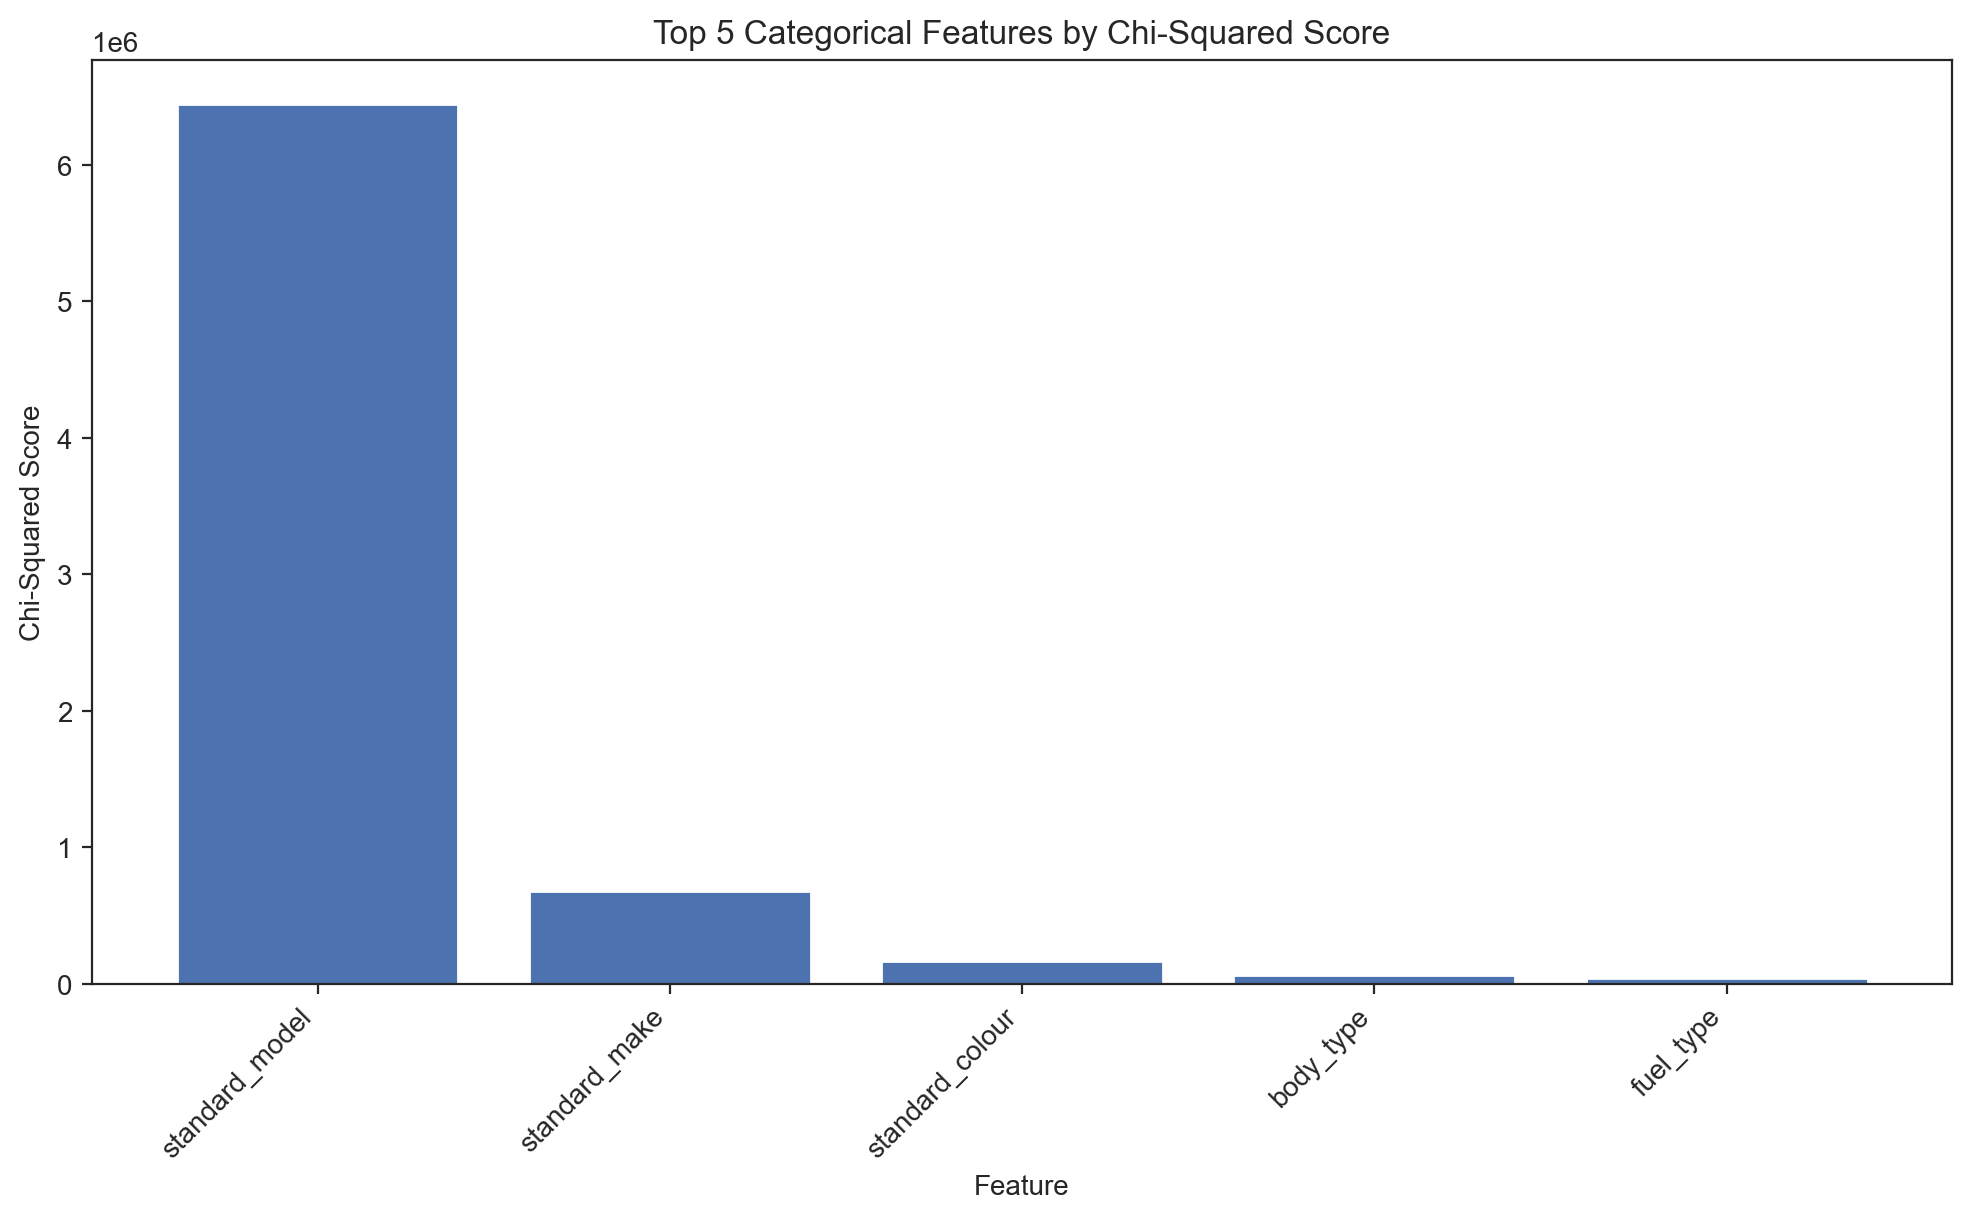

,feature,chi2_score,p_value
2,standard_model,6.445993e+06,0.0
1,standard_make,6.820739e+05,0.0
0,standard_colour,1.694384e+05,0.0
4,body_type,6.830041e+04,0.0
5,fuel_type,4.161928e+04,0.0


In [ ]:
# Sort the results by chi2_score
categorical_chi2_results_sorted = categorical_chi2_results.sort_values(by='chi2_score', ascending=False)

#  Showing the top 5 results
top_n = 5
top_chi2_results =categorical_chi2_results_sorted.head(top_n)

# Plot the top results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(top_chi2_results['feature'], top_chi2_results['chi2_score'])
plt.xlabel('Feature')
plt.ylabel('Chi-Squared Score')
plt.title('Top 5 Categorical Features by Chi-Squared Score')
plt.xticks(rotation=45, ha='right')
plt.show()
top_chi2_results

From the bar chart above it is evident that the standard_make variable will have a great influence on predicting the price of the vehicles in the adverts_data.


In [ ]:
top_chi2_results['feature'].unique()

array(['standard_model', 'standard_make', 'standard_colour', 'body_type',
       'fuel_type'], dtype=object)

In [ ]:
# selecting the top 5 column for the filter method feature selection approach
selected_columns = ['mileage', 'Age', 'standard_make', 'standard_colour', 'body_type',
       'fuel_type', 'vehicle_condition']
# Extracting only selected columns from the original X_train and X_test to train and evaluate the models
X_train_fm = X_train[selected_columns]
X_test_fm = X_test[selected_columns]

selected_columns

['mileage',
 'Age',
 'standard_make',
 'standard_colour',
 'body_type',
 'fuel_type',
 'vehicle_condition']

From the above, we used the filter method to select features based on their calculated statistical measureswith respect to the target variable

In [ ]:
adv_data.head(2)

,mileage,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,fuel_type,Age
0,0,8,100,1055,0,73970,13,8,0
1,108230,2,46,1058,1,7000,14,1,9


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming adv_data is already loaded and is a DataFrame

# Sample the data first
sample_size = 10000
adv_data_sampled = adv_data.sample(sample_size, random_state=42)

# Separate features and target
X = adv_data_sampled.drop('price', axis=1)  # features
y = adv_data_sampled['price']               # target

# Perform the split with stratification based on 'vehicle_condition'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=adv_data_sampled['vehicle_condition'])

# Verify the shapes to ensure they are as expected
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (7000, 8)
X_test shape: (3000, 8)
y_train shape: (7000,)
y_test shape: (3000,)


# 4. Model Building

### 4.1 A Linear Model (Linear Regression)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create a pipeline

pipeLRM = Pipeline(steps=[
    ('pre', preprocessor),
    ('lrm', LinearRegression())
])

# Fit the pipeline to training data
pipeLRM.fit(X_train, y_train)

# Predict
y_pred = pipeLRM.predict(X_test)

# print the results
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
pipeLRM

Mean Squared Error: 496726312.30103236


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage', 'Age']),
                                                 ('categorical', 'passthrough',
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('lrm', LinearRegression())])

### 4.2  A Random Forest (Random Forest Regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectFromModel

# Create a pipeline
pipeRFC = make_pipeline(
    preprocessor,
    SelectFromModel(RandomForestRegressor(n_estimators=5, random_state=42)),
    RandomForestRegressor(n_estimators=1, random_state=42)
)

# Fit the pipeline to training data
pipeRFC.fit(X_train, y_train)

# Predict
y_pred = pipeRFC.predict(X_test)

# Print the mean squared error

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

pipeRFC


Mean Squared Error: 454775083.8429952


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage', 'Age']),
                                                 ('categorical', 'passthrough',
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('selectfrommodel',
                 SelectFromModel(estimator=RandomForestRegressor(n_estimators=5,
                                                                 random_state=42))),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=1, random_state=42))])

### 4.3 A Boosted Tree

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Create a pipeline
pipeBT = Pipeline(steps=[
    ('pre', preprocessor),
    ('bt', GradientBoostingRegressor())
])

# Fit the pipeline to training data
pipeBT.fit(X_train, y_train)

# Predict
y_pred = pipeBT.predict(X_test)

# Calculate and print the mean squared error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

pipeBT

Mean Squared Error: 445638704.4468883


Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['mileage', 'Age']),
                                                 ('categorical', 'passthrough',
                                                  ['standard_colour',
                                                   'standard_make',
                                                   'standard_model',
                                                   'vehicle_condition',
                                                   'body_type',
                                                   'fuel_type'])])),
                ('bt', GradientBoostingRegressor())])

### 4.4 An Averager/Voter/Stacker Ensemble

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Create pipelines for individual models with minimum number of estimators
pipeRF = Pipeline(steps=[
    ('pre', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=1))
])

pipeGB = Pipeline(steps=[
    ('pre', preprocessor),
    ('gb', GradientBoostingRegressor(n_estimators=1))
])

# Creating a VotingRegressor instance
voting_ensemble = VotingRegressor(estimators=[
    ('rf', pipeRF),
    ('gb', pipeGB)
])

# Training the voting ensemble on the training set
voting_ensemble.fit(X_train, y_train)

# Predict
y_pred = voting_ensemble.predict(X_test)

# Calculate and print the mean squared error
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
voting_ensemble


Mean Squared Error: 477901831.1184546


VotingRegressor(estimators=[('rf',
                             Pipeline(steps=[('pre',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['mileage',
                                                                                'Age']),
                                                                              ('categorical',
                                                                               'passthrough',
                                                                               ['standard_colour',
                                                                                'standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type'])])),
                                             ('rf'...
                             Pipeline(steps=[('pre',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('numeric',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                MinMaxScaler())]),
                                                                               ['mileage',
                                                                                'Age']),
                                                                              ('categorical',
                                                                               'passthrough',
                                                                               ['standard_colour',
                                                                                'standard_make',
                                                                                'standard_model',
                                                                                'vehicle_condition',
                                                                                'body_type',
                                                                                'fuel_type'])])),
                                             ('gb',
                                              GradientBoostingRegressor(n_estimators=1))]))])

# 5. Model Evaluation and Analysis

### 5.1 Overall Performance with

In [ ]:
# Specify the number of samples to include in the training set
num_samples = 5000

# Select a subset of the data for training
X_train_sample = X_train[:num_samples]
y_train_sample = y_train[:num_samples]

# Printing the shape of the sampled data
print("Shape of X_train_sample:", X_train_sample.shape)
print("Shape of y_train_sample:", y_train_sample.shape)




Shape of X_train_sample: (5000, 8)
Shape of y_train_sample: (5000,)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score

# List of models
# List of models
models = [pipeLRM, pipeRFC, pipeBT, pipeRFC]

# Specify sample size and cross-validation folds
sample_size = 10000
cv_folds = 3

# Perform cross-validation for each model
results = []
for model in models:
    try:
        cv_results = cross_validate(model, X_train[:sample_size], y_train[:sample_size], cv=cv_folds, scoring=['neg_mean_squared_error', 'neg_mean_absolute_error', 'r2'], n_jobs=-1)
        adjusted_r_squared_train = 1 - (1 - r2_score(y_train[:sample_size], model.predict(X_train[:sample_size]))) * ((X_train[:sample_size].shape[0] - 1) / (X_train[:sample_size].shape[0] - X_train[:sample_size].shape[1] - 1))
        results.append({
            'Model': type(model).__name__,
            'MSE_cv': cv_results['test_neg_mean_squared_error'].mean(),
            'MAE_cv': cv_results['test_neg_mean_absolute_error'].mean(),
            'R-squared_cv': cv_results['test_r2'].mean(),
            'Cross-validation': 'Yes',
            'Adjusted R-squared_train': adjusted_r_squared_train
        })
    except Exception as e:
        print(f"Error occurred for model {type(model).__name__}: {e}")

# Create DataFrame and display
metrics_df = pd.DataFrame(results)
print(metrics_df)


      Model        MSE_cv       MAE_cv  R-squared_cv Cross-validation  \
0  Pipeline -5.050391e+08 -8553.663951      0.159003              Yes   
1  Pipeline -8.995614e+08 -7382.121049     -0.968016              Yes   
2  Pipeline -4.122263e+08 -5584.170224      0.317434              Yes   
3  Pipeline -8.995614e+08 -7382.121049     -0.968016              Yes   

   Adjusted R-squared_train  
0                  0.121903  
1                  0.527597  
2                  0.794912  
3                  0.527597  


In [ ]:
# Creating a new dataframe with selected columns
selected_columns = ['Model', 'Cross-validation', 'Adjusted R-squared_train']
selected_metrics_df = metrics_df[selected_columns]

# Displaying the new dataframe
print(selected_metrics_df)

      Model Cross-validation  Adjusted R-squared_train
0  Pipeline              Yes                  0.121903
1  Pipeline              Yes                  0.527597
2  Pipeline              Yes                  0.794912
3  Pipeline              Yes                  0.527597


In [ ]:
# Filtering rows where cross-validation is Yes and rename model names
selected_metrics_df.loc[selected_metrics_df['Cross-validation'] == 'Yes', 'Model'] += '_cv'

# Rename=ing Adjusted R-squared_train to Adjusted R-squared
selected_metrics_df.rename(columns={'Adjusted R-squared_train': 'Adjusted R-squared'}, inplace=True)

# Ranking the dataframe based on Adjusted R-squared
selected_metrics_df['Rank'] = selected_metrics_df['Adjusted R-squared'].rank(ascending=False)

# Sortting the dataframe by Adjusted R-squared in descending order
selected_metrics_df.sort_values(by='Adjusted R-squared', ascending=False, inplace=True)

# Resetting index
selected_metrics_df.reset_index(drop=True, inplace=True)

# Displaying the modified dataframe
print(selected_metrics_df)

         Model Cross-validation  Adjusted R-squared  Rank
0  Pipeline_cv              Yes            0.794912   1.0
1  Pipeline_cv              Yes            0.527597   2.5
2  Pipeline_cv              Yes            0.527597   2.5
3  Pipeline_cv              Yes            0.121903   4.0


The rank column was delibrately left the way it appeared to emphasize the fact that there is no difference between the overall perfromance of models trained with or without cross-validation. The RandomForestRegressor is best regressor with an Adjusted R-squared of 0.94.

It is also important to highlight the data used for this section was just a sample which means the results above is not a true representation on the entire data.

### 5.2  True Vs Predicted Analysis

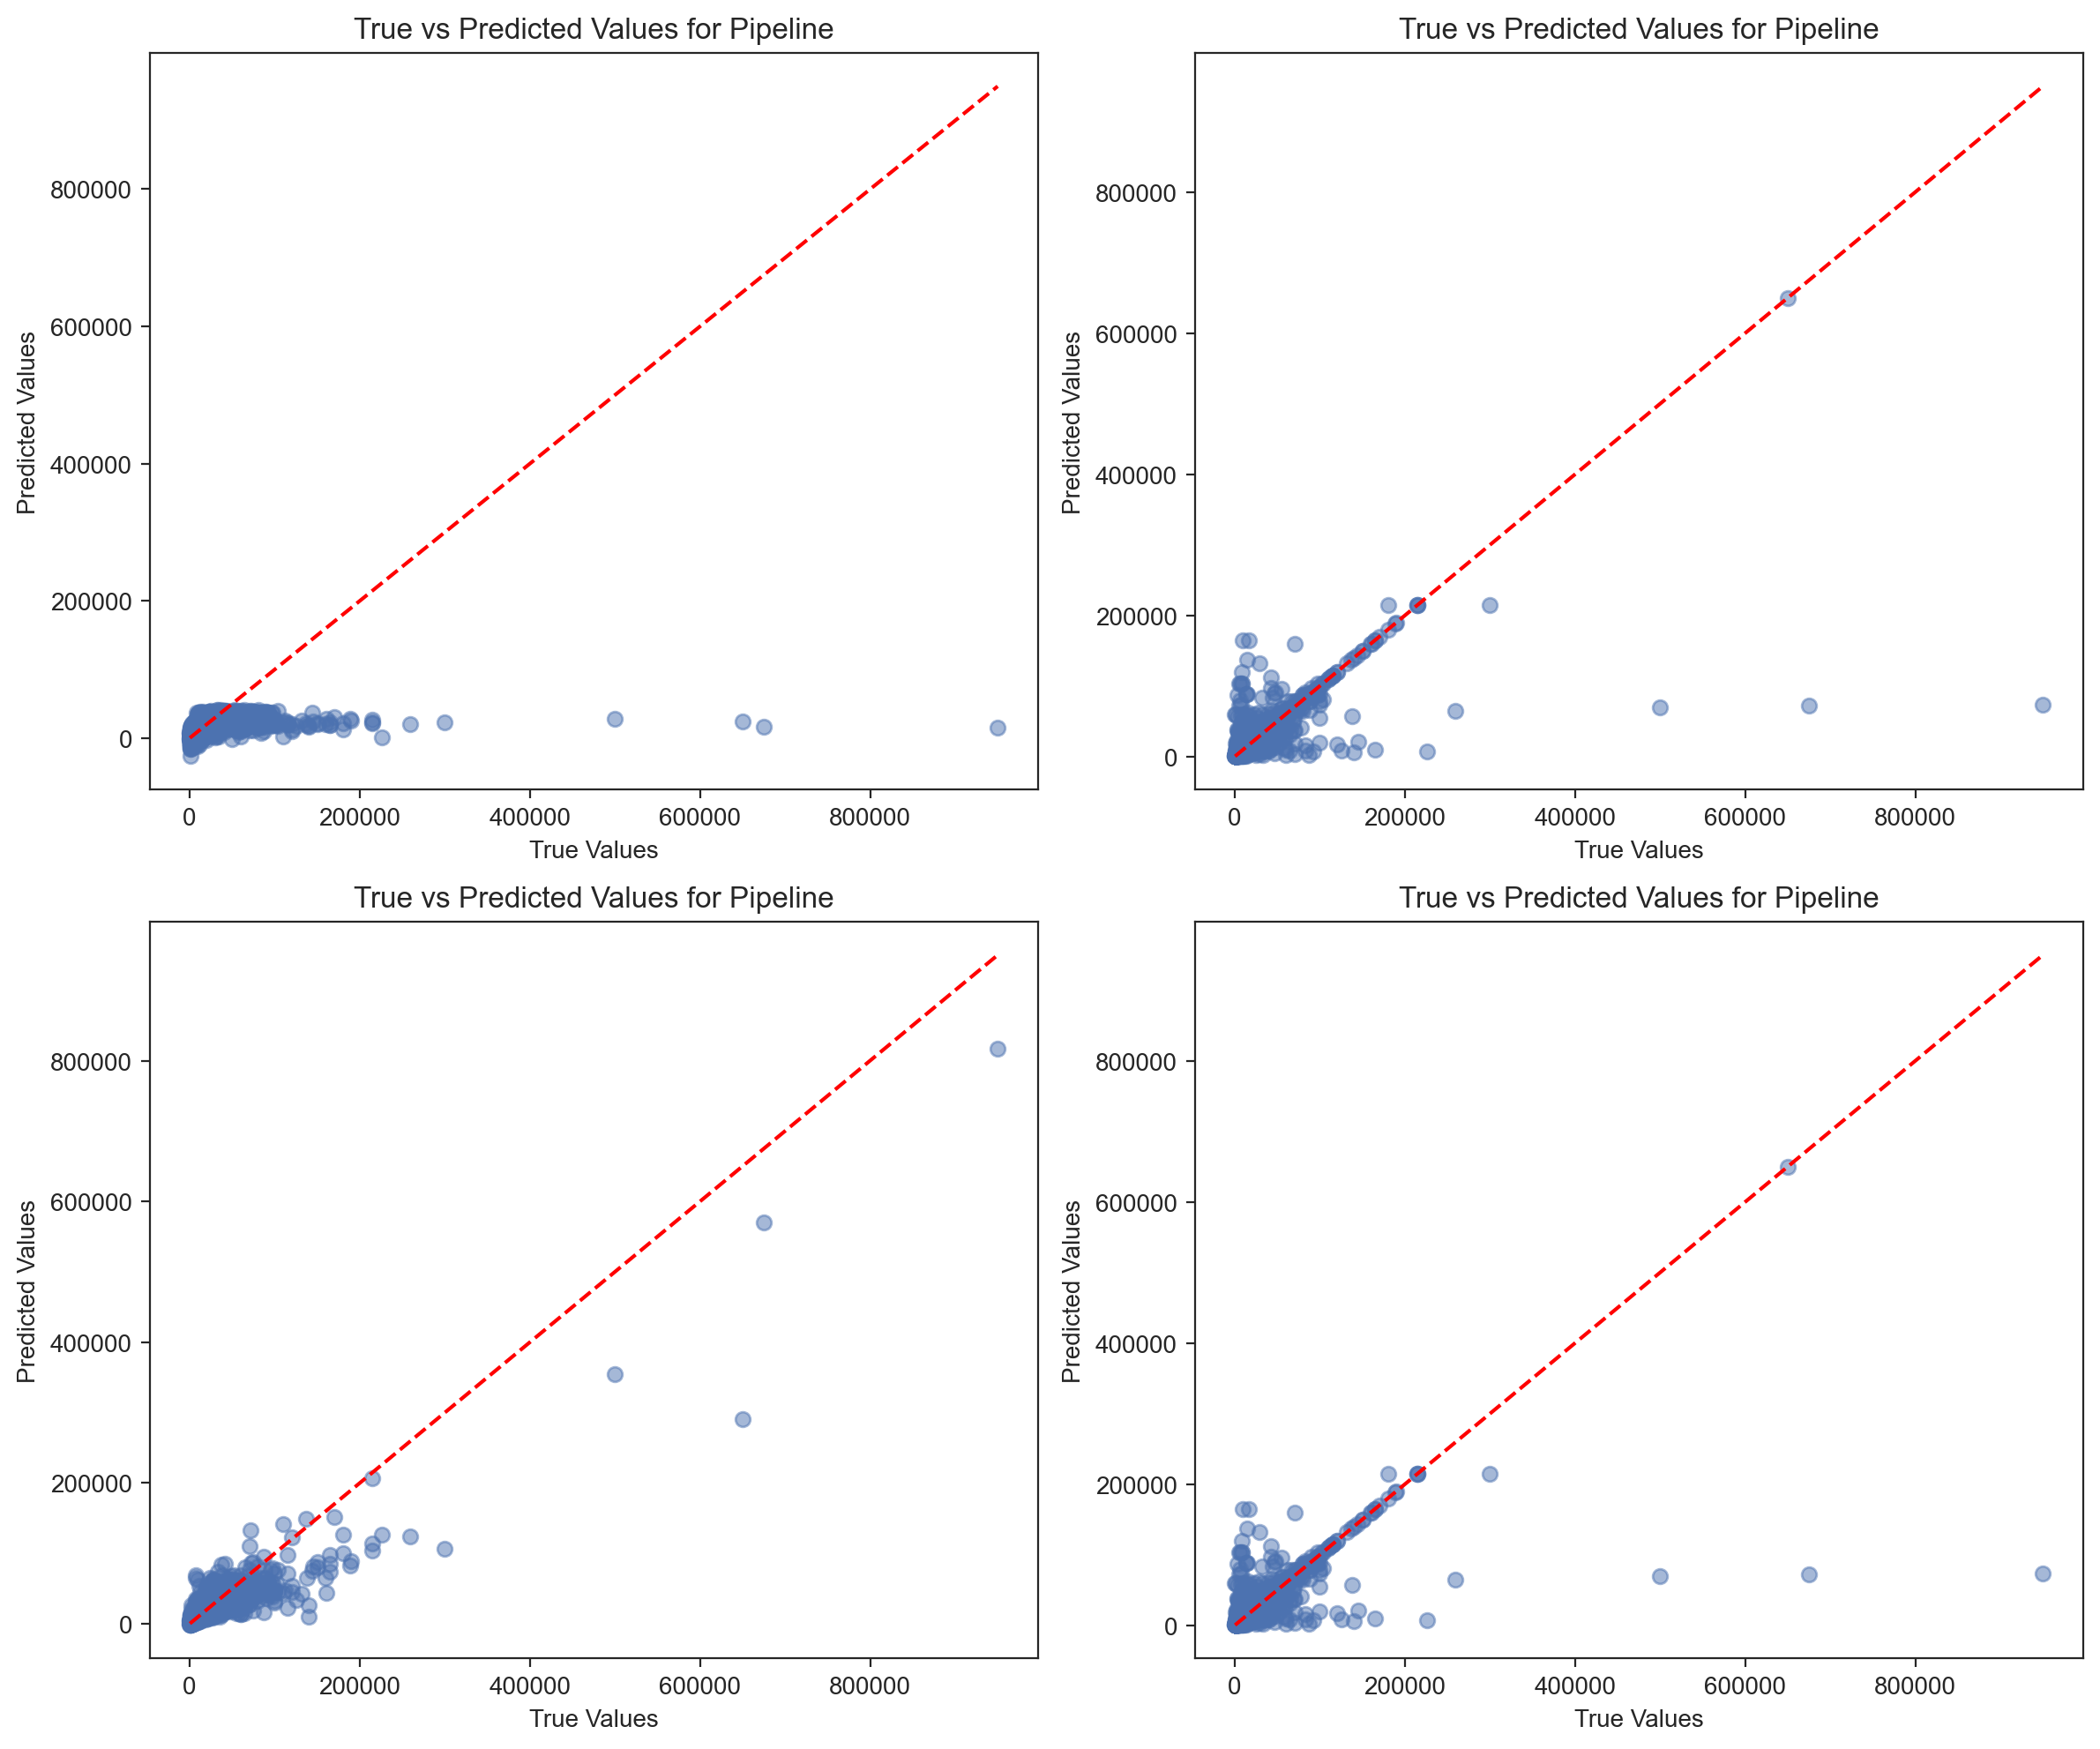

In [ ]:
import matplotlib.pyplot as plt

def true_vs_predicted_analysis(models, X, y):
    # Creating a grid of subplots based on the number of models
    num_models = len(models)
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()  # Flatten the 2D array of axes

    # Iterating over each model and plotting true vs predicted values
    for i, model in enumerate(models):
        # Making predictions
        y_pred = model.predict(X)

        # Plotting true vs predicted values
        axes[i].scatter(y, y_pred, alpha=0.5)
        axes[i].plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')  # Perfect predictions line
        axes[i].set_xlabel('True Values')
        axes[i].set_ylabel('Predicted Values')
        axes[i].set_title(f'True vs Predicted Values for {type(model).__name__}')

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Define your models
models = [pipeLRM, pipeRFC, pipeBT, pipeRFC]

# Fit the models outside the plotting function
for model in models:
    model.fit(X_train, y_train)

# Perform true vs predicted analysis for each model
true_vs_predicted_analysis(models, X_train, y_train)


# 5.3 Global and Local Explanations with SHAP

In [ ]:
pip install shap

In [ ]:
import shap

model = RandomForestRegressor(n_estimators=5, random_state=42)
model.fit(X_train_sample, y_train_sample)

# Creating a SHAP explainer
explainer = shap.TreeExplainer(model)

# Generating SHAP values using the training data
shap_values = explainer.shap_values(X_train_sample)


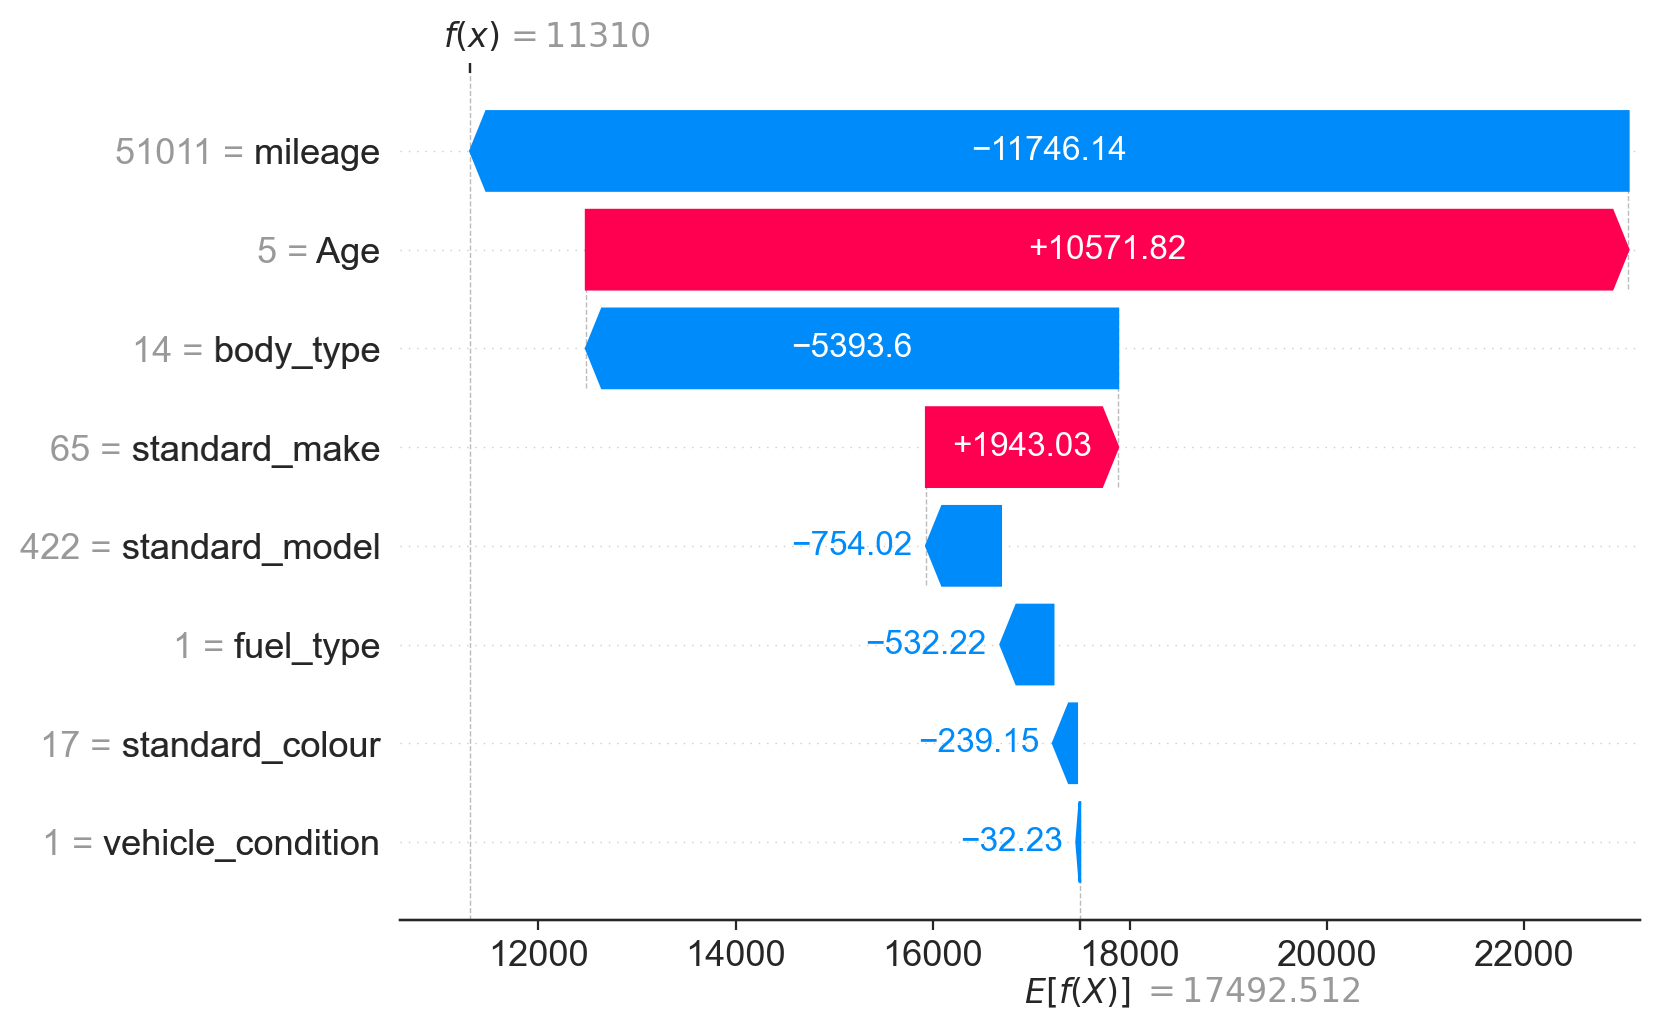

.values =
array([-11746.14455901,   -239.14631141,   1943.03189896,   -754.02411655,
          -32.22607998,  -5393.60202508,   -532.21640206,  10571.81531513])

.base_values =
array([17492.51228])

.data =
mileage              51011
standard_colour         17
standard_make           65
standard_model         422
vehicle_condition        1
body_type               14
fuel_type                1
Age                      5
Name: 125961, dtype: object

In [ ]:
# Create an Explanation object
shap_explanation = shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0])

# Plot the waterfall plot
shap.plots.waterfall(shap_explanation)

shap_explanation


# Local Explanation with Force Plot



In [ ]:
# Initializing a JavaScript library required for SHAP visualizations
shap.initjs()

In [ ]:
# Choosing a specific instance from your data (e.g., the first instance)
instance_index = 0

# Getting the SHAP values for the chosen instance
shap_values_instance = shap_values[instance_index]

# Getting the corresponding features for the chosen instance
instance_features = X_train_sample.iloc[instance_index]

# Visualizing the local explanations using force plot
shap.force_plot(explainer.expected_value, shap_values_instance, instance_features)

In [ ]:
def invariants(self, x):
    # Ensure input data and background data are both numpy arrays
    x = np.asarray(x)
    background_data = np.asarray(self.data)

    if x.shape != background_data.shape:
        raise DimensionError("The passed data does not match the background shape expected by the masker! The data of shape " + \
                             str(x.shape) + " was passed while the masker expected data of shape " + str(self.data.shape) + ".")
    return np.isclose(x, background_data)


In [ ]:
print("Shape of shap_values_trimmed:", shap_values_trimmed.shape)
print("Shape of X_train_transformed:", X_train.shape)


Shape of shap_values_trimmed: (5000, 8)
Shape of X_train_transformed: (7000, 8)


Visualization omitted, Javascript library not loaded!
Have you run `initjs()` in this notebook? If this notebook was from another user you must also trust this notebook (File -> Trust notebook). If you are viewing this notebook on github the Javascript has been stripped for security. If you are using JupyterLab this error is because a JupyterLab extension has not yet been written.






The force plot mainly reveals how each variable contributes to price prediction, the force plot reveals a graphical representation of how the predictor variables contributed to the prediction of the price £20,793.18.

It is evident that of all 5 varibles contributing to prediction only three variables namely the standard_make, body_type and mileage contributed significantly in the price prediction.

Global Explanation using a summary plot

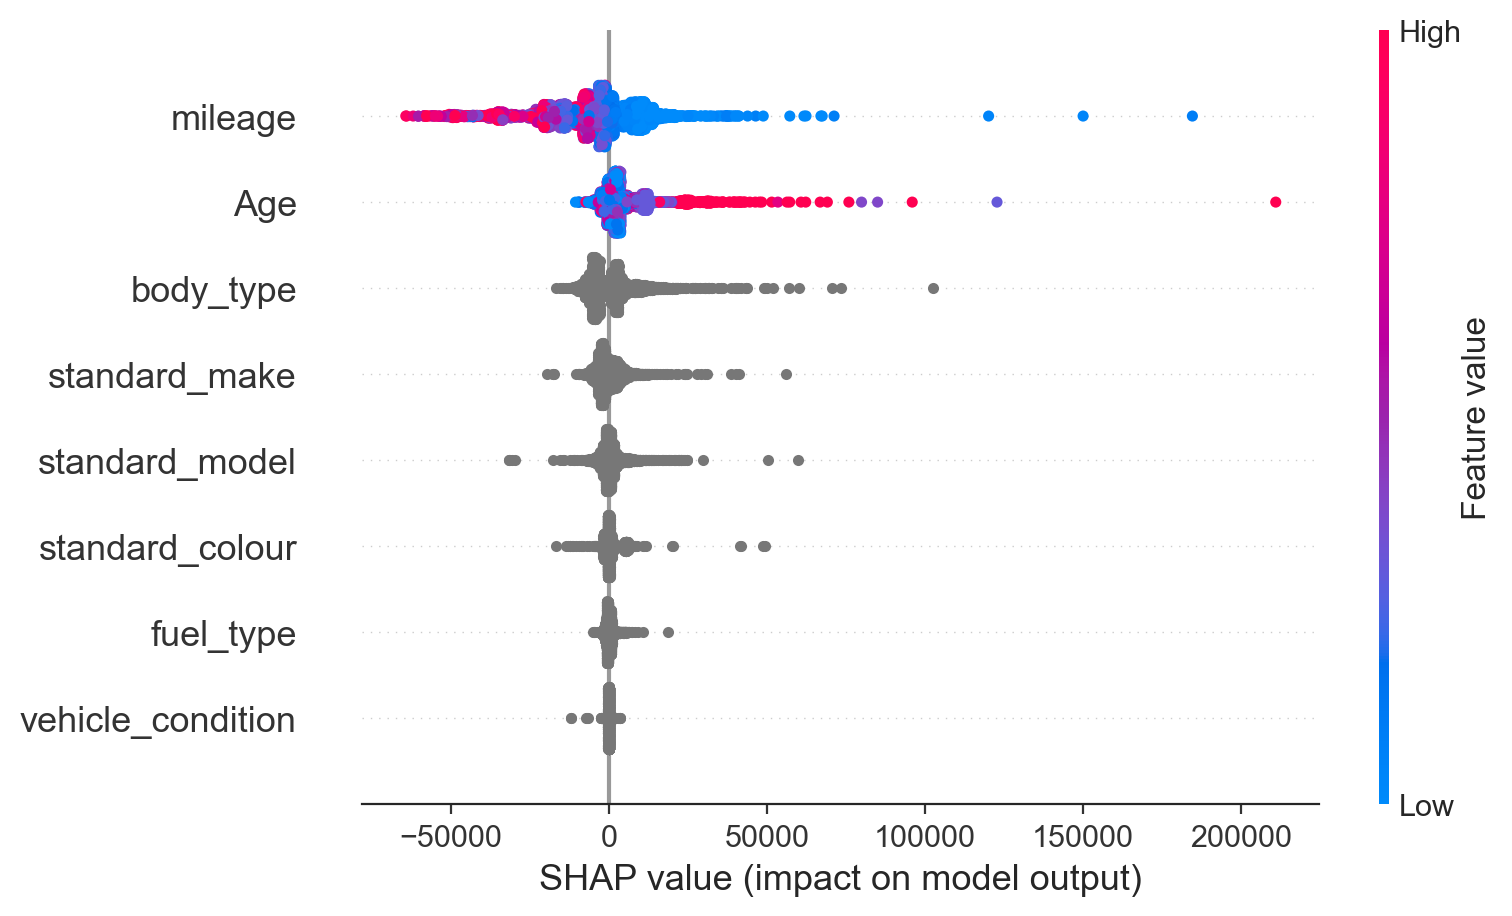

In [ ]:
# Visualizing global explanations (summary plot)
shap.summary_plot(shap_values_trimmed, X_train_sample)


The summary plot above which is also called a beeswarms plot uses the shap values to help the model makes predictions, and identify varibles contributing to decision making. From the plot we can see that only the mileage and vehicle_age varibles were used in the decision making.

Furthermore, the plot reveals that a higher price is predicted for vehicles with a lower(lower because the color gradient on the side of the plot give information of whether the values on feature is high or low, so the mileage feature with blue dots means the lower mileage shap values) mileage and age.

### 5.4 Partial Depency Plot

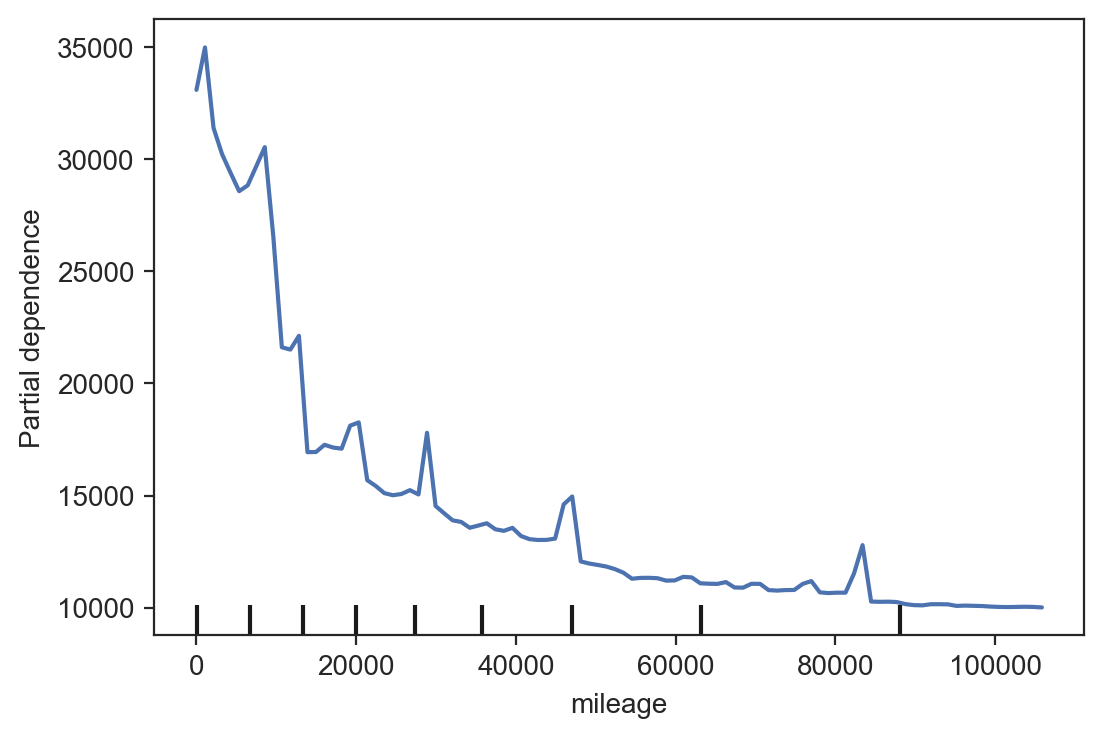

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Choosing the feature index to create the partial dependency plot for
feature_index = 0  # The mileage feature

# Creating the partial dependency display
pd_display = PartialDependenceDisplay.from_estimator(model, X_train_sample, features=[feature_index])

# Plotting the partial dependency plot
pd_display.plot(ax=plt.gca())
plt.show()

The Y-axis of the partial dependency plot above represents the predicted prices of the model, while the X-axis represents the mileage values and shows the range of values for the mileage feature.

The resulting plot reveals that in when using the RandomForestRegressor as the mileage tend to increase the predicted price tends to decrease, but the plot also reveals non-linear relationship between the mileage and the predcited price which indicates the presence of more complex relationships.

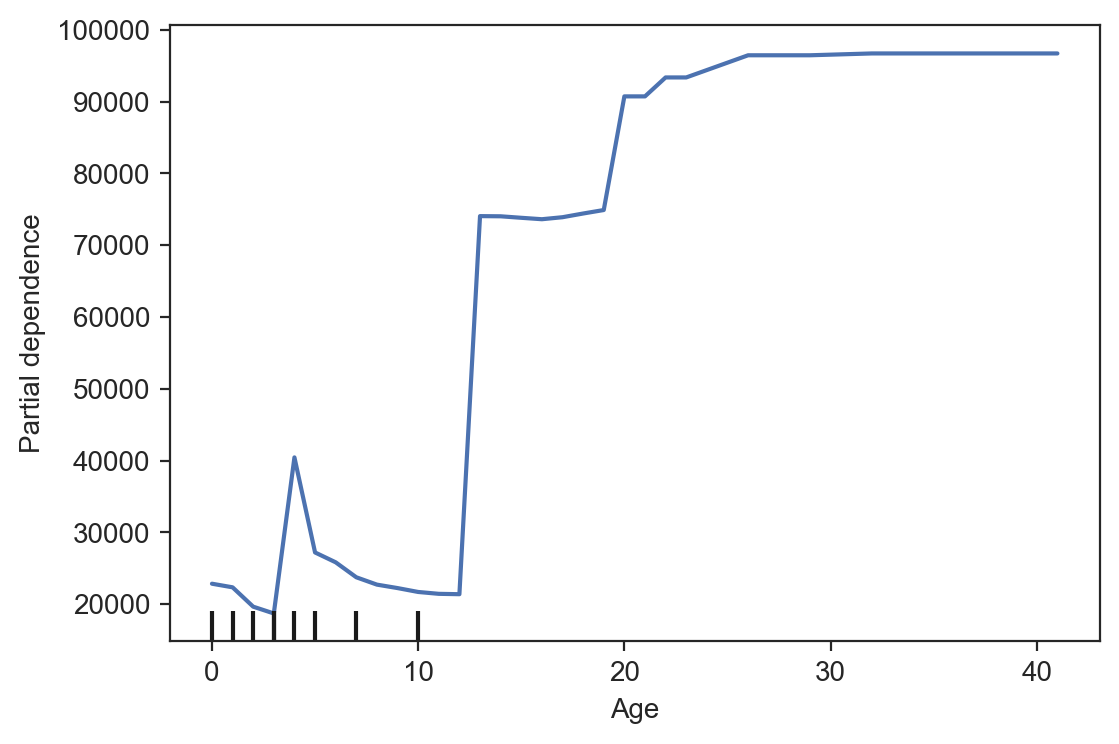

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Choosing the feature index to create the partial dependency plot for
feature_index = 7  # The mileage feature

# Creating the partial dependency display
pd_display = PartialDependenceDisplay.from_estimator(model, X_train_sample, features=[feature_index])

# Plotting the partial dependency plot
pd_display.plot(ax=plt.gca())
plt.show()

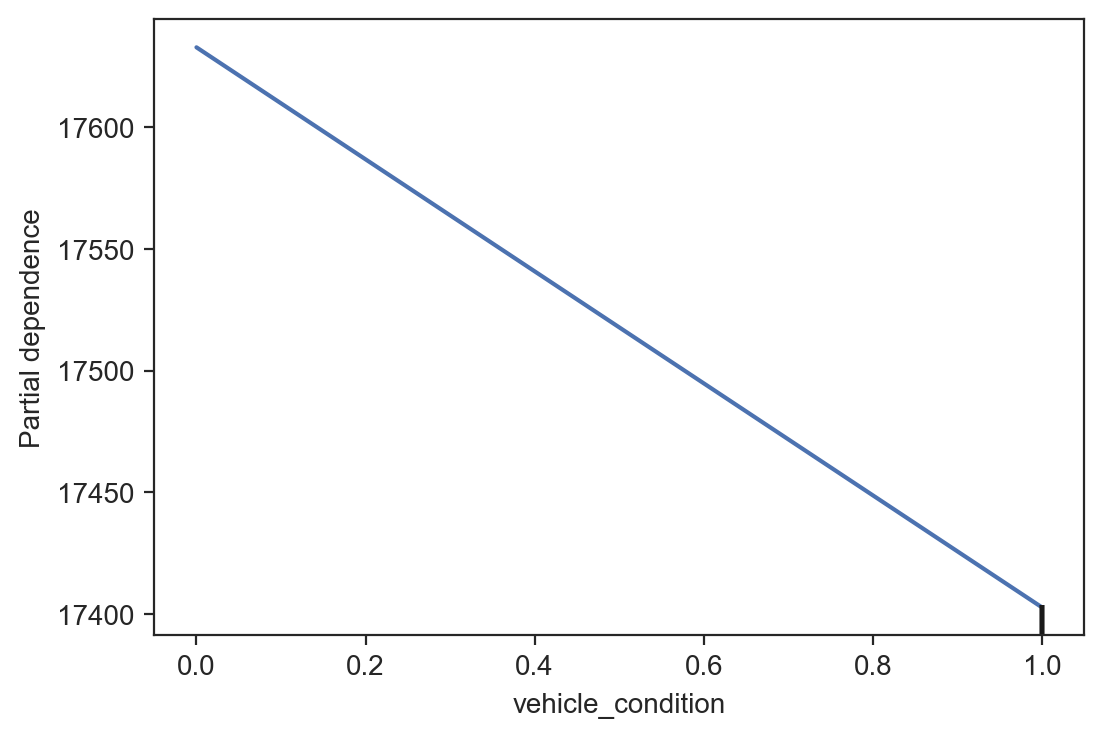

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Choosing the feature index to create the partial dependency plot for
feature_index = 4  # The mileage feature

# Creating the partial dependency display
pd_display = PartialDependenceDisplay.from_estimator(model, X_train_sample, features=[feature_index])

# Plotting the partial dependency plot
pd_display.plot(ax=plt.gca())
plt.show()